# **New York City Yellow Taxi Data**

# **NAME_CHIRAG GIRISH MOKASHI**
# **ACPML - EDA Assignment - EDA on NYC Taxi Records - Submission**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('/content/sample_data/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data



# Select the folder having data files
data_folder_path = '/content/drive/My Drive/Colab Notebooks/trip_records'
try:
    os.chdir(data_folder_path)
    print(f"Changed current working directory to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: Directory not found at '{data_folder_path}'.")
    print("Please ensure the path is correct and Google Drive is mounted.")
    import sys
    sys.exit("Exiting: Data directory not found.")
except Exception as e:
    print(f"An unexpected error occurred while changing directory: {e}")
    import sys
    sys.exit("Exiting due to directory access error.")

# Create a list of all the twelve files to read
file_list = os.listdir()
df_combined_sampled = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file

        file_path = os.path.join(os.getcwd(), file_name)

        print(f"\nProcessing file: {file_name}")

        # Reading the current monthly file
        monthly_df = pd.read_parquet(file_path)
        print(f"  Loaded {file_name}. Original shape: {monthly_df.shape}")

        # Ensure 'tpep_pickup_datetime' is a datetime object
        # errors='coerce' will turn unparseable dates into NaT
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'], errors='coerce')

        # Drop rows where datetime conversion failed (optional, but good for clean data)
        monthly_df.dropna(subset=['tpep_pickup_datetime'], inplace=True)

        # Extract date and hour for grouping
        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current month in this dataframe
        # by appending the sampled data from each hour to this.
        sampled_data_current_month = pd.DataFrame() # Initialise empty DF for current month's sampled data

        # Get unique dates in the current month's data
        unique_dates = monthly_df['pickup_date'].unique()
        print(f"  Sampling across {len(unique_dates)} unique dates in {file_name}...")

        # Loop through dates and then loop through every hour of each date
        for current_date in unique_dates:
            daily_data = monthly_df[monthly_df['pickup_date'] == current_date]

            # Iterate through each hour of the selected date (0 to 23)
            for hour in range(24):
                hour_data = daily_data[daily_data['pickup_hour'] == hour]

                if not hour_data.empty: # Only sample if there's data for this specific hour
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.05, random_state=42) # Using the specified random_state

                    # add data of this hour to the dataframe for the current month
                    sampled_data_current_month = pd.concat([sampled_data_current_month, sample])

        # Concatenate the sampled data of all the dates (for the current month)
        # to the final combined sampled dataframe
        df_combined_sampled = pd.concat([df_combined_sampled, sampled_data_current_month], ignore_index=True)
        print(f"  Finished sampling {file_name}. Total sampled rows so far: {df_combined_sampled.shape[0]}")

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

Changed current working directory to: /content/drive/My Drive/Colab Notebooks/trip_records

Processing file: 2023-1.parquet
  Loaded 2023-1.parquet. Original shape: (3041714, 19)
  Sampling across 36 unique dates in 2023-1.parquet...
  Finished sampling 2023-1.parquet. Total sampled rows so far: 152087

Processing file: 2023-10.parquet
  Loaded 2023-10.parquet. Original shape: (3485185, 19)
  Sampling across 37 unique dates in 2023-10.parquet...
  Finished sampling 2023-10.parquet. Total sampled rows so far: 326342

Processing file: 2023-11.parquet
  Loaded 2023-11.parquet. Original shape: (3302857, 19)
  Sampling across 33 unique dates in 2023-11.parquet...
  Finished sampling 2023-11.parquet. Total sampled rows so far: 491475

Processing file: 2023-12.parquet
  Loaded 2023-12.parquet. Original shape: (3333925, 19)
  Sampling across 36 unique dates in 2023-12.parquet...
  Finished sampling 2023-12.parquet. Total sampled rows so far: 658184

Processing file: 2023-2.parquet
  Loaded 202

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [11]:
print(f"\n--- Saving Sampled Data to CSV ---")
print(f"Current number of entries in sampled DataFrame: {df_combined_sampled.shape[0]}")


--- Saving Sampled Data to CSV ---
Current number of entries in sampled DataFrame: 1896400


As after sampling of 5% got total entries of 1896400 but suggested total entries is 250,000 to 300,000.RE-Running samplying to adjusted frac of 0.0075

In [13]:
df_combined_sampled_N = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file

        file_path = os.path.join(os.getcwd(), file_name)

        print(f"\nProcessing file: {file_name}")

        # Reading the current monthly file
        monthly_df = pd.read_parquet(file_path)
        print(f"  Loaded {file_name}. Original shape: {monthly_df.shape}")

        # Ensure 'tpep_pickup_datetime' is a datetime object
        # errors='coerce' will turn unparseable dates into NaT
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'], errors='coerce')

        # Drop rows where datetime conversion failed (optional, but good for clean data)
        monthly_df.dropna(subset=['tpep_pickup_datetime'], inplace=True)

        # Extract date and hour for grouping
        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current month in this dataframe
        # by appending the sampled data from each hour to this.
        sampled_data_current_month = pd.DataFrame() # Initialise empty DF for current month's sampled data

        # Get unique dates in the current month's data
        unique_dates = monthly_df['pickup_date'].unique()
        print(f"  Sampling across {len(unique_dates)} unique dates in {file_name}...")

        # Loop through dates and then loop through every hour of each date
        for current_date in unique_dates:
            daily_data = monthly_df[monthly_df['pickup_date'] == current_date]

            # Iterate through each hour of the selected date (0 to 23)
            for hour in range(24):
                hour_data = daily_data[daily_data['pickup_hour'] == hour]

                if not hour_data.empty: # Only sample if there's data for this specific hour
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.0075, random_state=42) # Using the specified random_state

                    # add data of this hour to the dataframe for the current month
                    sampled_data_current_month = pd.concat([sampled_data_current_month, sample])

        # Concatenate the sampled data of all the dates (for the current month)
        # to the final combined sampled dataframe
        df_combined_sampled_N = pd.concat([df_combined_sampled_N, sampled_data_current_month], ignore_index=True)
        print(f"  Finished sampling {file_name}. Total sampled rows so far: {df_combined_sampled_N.shape[0]}")

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")


Processing file: 2023-1.parquet
  Loaded 2023-1.parquet. Original shape: (3041714, 19)
  Sampling across 36 unique dates in 2023-1.parquet...
  Finished sampling 2023-1.parquet. Total sampled rows so far: 22821

Processing file: 2023-10.parquet
  Loaded 2023-10.parquet. Original shape: (3485185, 19)
  Sampling across 37 unique dates in 2023-10.parquet...
  Finished sampling 2023-10.parquet. Total sampled rows so far: 48955

Processing file: 2023-11.parquet
  Loaded 2023-11.parquet. Original shape: (3302857, 19)
  Sampling across 33 unique dates in 2023-11.parquet...
  Finished sampling 2023-11.parquet. Total sampled rows so far: 73718

Processing file: 2023-12.parquet
  Loaded 2023-12.parquet. Original shape: (3333925, 19)
  Sampling across 36 unique dates in 2023-12.parquet...
  Finished sampling 2023-12.parquet. Total sampled rows so far: 98719

Processing file: 2023-2.parquet
  Loaded 2023-2.parquet. Original shape: (3374086, 19)
  Sampling across 45 unique dates in 2023-2.parquet.

In [14]:
print(f"\n--- Saving Sampled Data to CSV ---")
print(f"Current number of entries in sampled DataFrame: {df_combined_sampled_N.shape[0]}")


--- Saving Sampled Data to CSV ---
Current number of entries in sampled DataFrame: 284492


In [15]:
output_directory = '/content/drive/My Drive/Colab Notebooks/trip_records/sampled_data'

# Create the output directory if it doesn't already exist
os.makedirs(output_directory, exist_ok=True)
print(f"Ensured output directory exists: {output_directory}")

# Define the full path for the CSV file
csv_file_path = os.path.join(output_directory, 'sampled_trip_records.csv')
print(f"Attempting to save sampled data to CSV: {csv_file_path}")

try:
    # Use to_csv() to save the DataFrame.
    df_combined_sampled_N.to_csv(csv_file_path, index=False)
    print(f"Successfully saved sampled data to CSV: {csv_file_path}")
except Exception as e:
    print(f"Error saving to CSV: {e}")

print("CSV CREATED")

Ensured output directory exists: /content/drive/My Drive/Colab Notebooks/trip_records/sampled_data
Attempting to save sampled data to CSV: /content/drive/My Drive/Colab Notebooks/trip_records/sampled_data/sampled_trip_records.csv
Successfully saved sampled data to CSV: /content/drive/My Drive/Colab Notebooks/trip_records/sampled_data/sampled_trip_records.csv
CSV CREATED


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [5]:
# Load the new data file
output_directory = '/content/drive/My Drive/Colab Notebooks/trip_records/sampled_data'
csv_file_path = os.path.join(output_directory, 'sampled_trip_records.csv')
df_sampled = pd.read_csv(csv_file_path)


In [6]:
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [7]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   tpep_pickup_datetime   284492 non-null  object 
 2   tpep_dropoff_datetime  284492 non-null  object 
 3   passenger_count        275065 non-null  float64
 4   trip_distance          284492 non-null  float64
 5   RatecodeID             275065 non-null  float64
 6   store_and_fwd_flag     275065 non-null  object 
 7   PULocationID           284492 non-null  int64  
 8   DOLocationID           284492 non-null  int64  
 9   payment_type           284492 non-null  int64  
 10  fare_amount            284492 non-null  float64
 11  extra                  284492 non-null  float64
 12  mta_tax                284492 non-null  float64
 13  tip_amount             284492 non-null  float64
 14  tolls_amount           284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

Indexing was taken care of during sampling


In [277]:
# Fix the index and drop any columns that are not needed
## Indexing was taken care of during sampling
##When we tried to link the trip data to our taxi zone names (like "Midtown East"). The zone data had some duplicate ID numbers, which stopped us from properly connecting everything. To fix this, we removed those duplicate zone IDs, ensuring each ID pointed to only one unique location. This allowed us to accurately map trip IDs to their corresponding zone names and boroughs, which was essential for all our location-based insights.


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [8]:
# Combine the two airport fee columns

df_sampled['Airport_Fee'] = df_sampled['Airport_fee'].fillna(df_sampled['airport_fee'])

# Define columns to drop: original 'airport_fee' columns and temporary 'pickup_date', 'pickup_hour'.
columns_to_drop = ['airport_fee', 'Airport_fee']

# Drop columns if they exist in the DataFrame.
existing_columns_to_drop = [col for col in columns_to_drop if col in df_sampled.columns]
if existing_columns_to_drop:
    df_sampled.drop(columns=existing_columns_to_drop, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")

Dropped columns: ['airport_fee', 'Airport_fee']


In [9]:
print("\n--- DataFrame after column operations ---")
print(df_sampled.info())



--- DataFrame after column operations ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   tpep_pickup_datetime   284492 non-null  object 
 2   tpep_dropoff_datetime  284492 non-null  object 
 3   passenger_count        275065 non-null  float64
 4   trip_distance          284492 non-null  float64
 5   RatecodeID             275065 non-null  float64
 6   store_and_fwd_flag     275065 non-null  object 
 7   PULocationID           284492 non-null  int64  
 8   DOLocationID           284492 non-null  int64  
 9   payment_type           284492 non-null  int64  
 10  fare_amount            284492 non-null  float64
 11  extra                  284492 non-null  float64
 12  mta_tax                284492 non-null  float64
 13  tip_amount             284492 non-null  float6

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [10]:
# check where values of fare amount are negative
negative_ratecode_id_rows = df_sampled[df_sampled['RatecodeID'] < 0]


print(f"Number of rows with negative 'RatecodeID': {len(negative_ratecode_id_rows)}")


Number of rows with negative 'RatecodeID': 0


Did you notice something different in the `RatecodeID` column for above records?

In [11]:
# Analyse RatecodeID for the negative fare amounts

columns_to_check = [
    'VendorID',
    'passenger_count',
    'RatecodeID',
    'store_and_fwd_flag',
    'payment_type',
    'Airport_Fee',
    'extra',
    'mta_tax',
    'improvement_surcharge',

    'congestion_surcharge'
]

for col in columns_to_check:
    if col in df_sampled.columns:
        print(f"\nUnique values for '{col}':")
        unique_values = df_sampled[col].unique()
        print(unique_values)
        print(f"Number of unique values: {len(unique_values)}")
        # Add a note for columns that might have many unique values
        if len(unique_values) > 50: # Arbitrary threshold for "many"
            print(f"(Note: This column has a large number of unique values, displaying all.)")
    else:
        print(f"\nWarning: Column '{col}' not found in DataFrame.")


Unique values for 'VendorID':
[2 1 6]
Number of unique values: 3

Unique values for 'passenger_count':
[ 1.  2.  3. nan  4.  6.  5.  0.  8.  9.  7.]
Number of unique values: 11

Unique values for 'RatecodeID':
[ 1. nan  2.  5.  3. 99.  4.]
Number of unique values: 7

Unique values for 'store_and_fwd_flag':
['N' nan 'Y']
Number of unique values: 3

Unique values for 'payment_type':
[2 1 0 4 3]
Number of unique values: 5

Unique values for 'Airport_Fee':
[ 1.25  0.     nan  1.75 -1.75]
Number of unique values: 5

Unique values for 'extra':
[ 6.    1.    0.    3.5   3.75  2.5   1.25  5.    8.75  6.25  2.25  7.25
  0.5   7.5  11.25  6.8   3.    9.75 10.    8.5   4.75  2.72  9.25  4.25
  6.75  1.75  2.75 11.75 10.25  7.75  3.25 -2.5   0.75  3.2   2.    5.25
  4.05 12.5   2.45 14.25]
Number of unique values: 40

Unique values for 'mta_tax':
[ 0.5   0.    0.8  -0.5   0.05]
Number of unique values: 5

Unique values for 'improvement_surcharge':
[ 1.   0.   0.3 -1. ]
Number of unique values: 4


In [12]:
# Find which columns have negative values



In [13]:
# fix these negative values
monetary_columns_to_fix = [
    'Airport_Fee',
    'extra',
    'mta_tax',
    'improvement_surcharge',
    'congestion_surcharge'
]

for col in monetary_columns_to_fix:
    if col in df_sampled.columns:
        # Count negative values before fixing
        neg_count_before = (df_sampled[col] < 0).sum()
        if neg_count_before > 0:
            # Set negative values to 0
            df_sampled.loc[df_sampled[col] < 0, col] = 0
            print(f"  Fixed '{col}': {neg_count_before} negative values set to 0.")
        else:
            print(f"  '{col}': No negative values found.")
    else:
        print(f"  Warning: Column '{col}' not found in DataFrame. Skipping.")



  Fixed 'Airport_Fee': 2 negative values set to 0.
  Fixed 'extra': 1 negative values set to 0.
  Fixed 'mta_tax': 11 negative values set to 0.
  Fixed 'improvement_surcharge': 11 negative values set to 0.
  Fixed 'congestion_surcharge': 6 negative values set to 0.


In [14]:
# Analyse RatecodeID for the negative fare amounts

columns_to_check = [
    'VendorID',
    'passenger_count',
    'RatecodeID',
    'store_and_fwd_flag',
    'payment_type',
    'Airport_Fee',
    'extra',
    'mta_tax',
    'improvement_surcharge',

    'congestion_surcharge'
]

for col in columns_to_check:
    if col in df_sampled.columns:
        print(f"\nUnique values for '{col}':")
        unique_values = df_sampled[col].unique()
        print(unique_values)
        print(f"Number of unique values: {len(unique_values)}")
        # Add a note for columns that might have many unique values
        if len(unique_values) > 50: # Arbitrary threshold for "many"
            print(f"(Note: This column has a large number of unique values, displaying all.)")
    else:
        print(f"\nWarning: Column '{col}' not found in DataFrame.")


Unique values for 'VendorID':
[2 1 6]
Number of unique values: 3

Unique values for 'passenger_count':
[ 1.  2.  3. nan  4.  6.  5.  0.  8.  9.  7.]
Number of unique values: 11

Unique values for 'RatecodeID':
[ 1. nan  2.  5.  3. 99.  4.]
Number of unique values: 7

Unique values for 'store_and_fwd_flag':
['N' nan 'Y']
Number of unique values: 3

Unique values for 'payment_type':
[2 1 0 4 3]
Number of unique values: 5

Unique values for 'Airport_Fee':
[1.25 0.    nan 1.75]
Number of unique values: 4

Unique values for 'extra':
[ 6.    1.    0.    3.5   3.75  2.5   1.25  5.    8.75  6.25  2.25  7.25
  0.5   7.5  11.25  6.8   3.    9.75 10.    8.5   4.75  2.72  9.25  4.25
  6.75  1.75  2.75 11.75 10.25  7.75  3.25  0.75  3.2   2.    5.25  4.05
 12.5   2.45 14.25]
Number of unique values: 39

Unique values for 'mta_tax':
[0.5  0.   0.8  0.05]
Number of unique values: 4

Unique values for 'improvement_surcharge':
[1.  0.  0.3]
Number of unique values: 3

Unique values for 'congestion_sur

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [15]:
# Find the proportion of missing values in each column

total_rows = len(df_sampled)

# List of all columns in the DataFrame
all_columns = df_sampled.columns

for col in all_columns:
    missing_count = df_sampled[col].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"'{col}': {missing_percentage:.2f}% missing values ({missing_count}/{total_rows})")


'VendorID': 0.00% missing values (0/284492)
'tpep_pickup_datetime': 0.00% missing values (0/284492)
'tpep_dropoff_datetime': 0.00% missing values (0/284492)
'passenger_count': 3.31% missing values (9427/284492)
'trip_distance': 0.00% missing values (0/284492)
'RatecodeID': 3.31% missing values (9427/284492)
'store_and_fwd_flag': 3.31% missing values (9427/284492)
'PULocationID': 0.00% missing values (0/284492)
'DOLocationID': 0.00% missing values (0/284492)
'payment_type': 0.00% missing values (0/284492)
'fare_amount': 0.00% missing values (0/284492)
'extra': 0.00% missing values (0/284492)
'mta_tax': 0.00% missing values (0/284492)
'tip_amount': 0.00% missing values (0/284492)
'tolls_amount': 0.00% missing values (0/284492)
'improvement_surcharge': 0.00% missing values (0/284492)
'total_amount': 0.00% missing values (0/284492)
'congestion_surcharge': 3.31% missing values (9427/284492)
'pickup_date': 0.00% missing values (0/284492)
'pickup_hour': 0.00% missing values (0/284492)
'Airpor

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [16]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

passenger_count_mode = df_sampled['passenger_count'].mode()[0]
df_sampled['passenger_count'].fillna(passenger_count_mode, inplace=True)




In [17]:
for col in all_columns:
    missing_count = df_sampled[col].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"'{col}': {missing_percentage:.2f}% missing values ({missing_count}/{total_rows})")


'VendorID': 0.00% missing values (0/284492)
'tpep_pickup_datetime': 0.00% missing values (0/284492)
'tpep_dropoff_datetime': 0.00% missing values (0/284492)
'passenger_count': 0.00% missing values (0/284492)
'trip_distance': 0.00% missing values (0/284492)
'RatecodeID': 3.31% missing values (9427/284492)
'store_and_fwd_flag': 3.31% missing values (9427/284492)
'PULocationID': 0.00% missing values (0/284492)
'DOLocationID': 0.00% missing values (0/284492)
'payment_type': 0.00% missing values (0/284492)
'fare_amount': 0.00% missing values (0/284492)
'extra': 0.00% missing values (0/284492)
'mta_tax': 0.00% missing values (0/284492)
'tip_amount': 0.00% missing values (0/284492)
'tolls_amount': 0.00% missing values (0/284492)
'improvement_surcharge': 0.00% missing values (0/284492)
'total_amount': 0.00% missing values (0/284492)
'congestion_surcharge': 3.31% missing values (9427/284492)
'pickup_date': 0.00% missing values (0/284492)
'pickup_hour': 0.00% missing values (0/284492)
'Airport_F

Did you find zeroes in passenger_count? Handle these.

In [18]:
df_sampled.loc[df_sampled['passenger_count'] == 0, 'passenger_count'] = 1

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [19]:
# Fix missing values in 'RatecodeID'

ratecode_id_mode = df_sampled['RatecodeID'].mode()[0]
df_sampled['RatecodeID'].fillna(ratecode_id_mode, inplace=True)


In [20]:
for col in all_columns:
    missing_count = df_sampled[col].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"'{col}': {missing_percentage:.2f}% missing values ({missing_count}/{total_rows})")


'VendorID': 0.00% missing values (0/284492)
'tpep_pickup_datetime': 0.00% missing values (0/284492)
'tpep_dropoff_datetime': 0.00% missing values (0/284492)
'passenger_count': 0.00% missing values (0/284492)
'trip_distance': 0.00% missing values (0/284492)
'RatecodeID': 0.00% missing values (0/284492)
'store_and_fwd_flag': 3.31% missing values (9427/284492)
'PULocationID': 0.00% missing values (0/284492)
'DOLocationID': 0.00% missing values (0/284492)
'payment_type': 0.00% missing values (0/284492)
'fare_amount': 0.00% missing values (0/284492)
'extra': 0.00% missing values (0/284492)
'mta_tax': 0.00% missing values (0/284492)
'tip_amount': 0.00% missing values (0/284492)
'tolls_amount': 0.00% missing values (0/284492)
'improvement_surcharge': 0.00% missing values (0/284492)
'total_amount': 0.00% missing values (0/284492)
'congestion_surcharge': 3.31% missing values (9427/284492)
'pickup_date': 0.00% missing values (0/284492)
'pickup_hour': 0.00% missing values (0/284492)
'Airport_Fee'

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [21]:
# handle null values in congestion_surcharge
congestion_surcharge_mode = df_sampled['congestion_surcharge'].mode()[0]
df_sampled['congestion_surcharge'].fillna(congestion_surcharge_mode, inplace=True)






In [22]:
for col in all_columns:
    missing_count = df_sampled[col].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"'{col}': {missing_percentage:.2f}% missing values ({missing_count}/{total_rows})")

'VendorID': 0.00% missing values (0/284492)
'tpep_pickup_datetime': 0.00% missing values (0/284492)
'tpep_dropoff_datetime': 0.00% missing values (0/284492)
'passenger_count': 0.00% missing values (0/284492)
'trip_distance': 0.00% missing values (0/284492)
'RatecodeID': 0.00% missing values (0/284492)
'store_and_fwd_flag': 3.31% missing values (9427/284492)
'PULocationID': 0.00% missing values (0/284492)
'DOLocationID': 0.00% missing values (0/284492)
'payment_type': 0.00% missing values (0/284492)
'fare_amount': 0.00% missing values (0/284492)
'extra': 0.00% missing values (0/284492)
'mta_tax': 0.00% missing values (0/284492)
'tip_amount': 0.00% missing values (0/284492)
'tolls_amount': 0.00% missing values (0/284492)
'improvement_surcharge': 0.00% missing values (0/284492)
'total_amount': 0.00% missing values (0/284492)
'congestion_surcharge': 0.00% missing values (0/284492)
'pickup_date': 0.00% missing values (0/284492)
'pickup_hour': 0.00% missing values (0/284492)
'Airport_Fee': 3

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [23]:
# Handle any remaining missing values

# Impute NaN values in 'store_and_fwd_flag' with the mode
store_and_fwd_flag_mode = df_sampled['store_and_fwd_flag'].mode()[0]
df_sampled['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode, inplace=True)

# Impute NaN values in 'Airport_Fee' with the mode
airport_fee_mode = df_sampled['Airport_Fee'].mode()[0]
df_sampled['Airport_Fee'].fillna(airport_fee_mode, inplace=True)


In [24]:
for col in all_columns:
    missing_count = df_sampled[col].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"'{col}': {missing_percentage:.2f}% missing values ({missing_count}/{total_rows})")

'VendorID': 0.00% missing values (0/284492)
'tpep_pickup_datetime': 0.00% missing values (0/284492)
'tpep_dropoff_datetime': 0.00% missing values (0/284492)
'passenger_count': 0.00% missing values (0/284492)
'trip_distance': 0.00% missing values (0/284492)
'RatecodeID': 0.00% missing values (0/284492)
'store_and_fwd_flag': 0.00% missing values (0/284492)
'PULocationID': 0.00% missing values (0/284492)
'DOLocationID': 0.00% missing values (0/284492)
'payment_type': 0.00% missing values (0/284492)
'fare_amount': 0.00% missing values (0/284492)
'extra': 0.00% missing values (0/284492)
'mta_tax': 0.00% missing values (0/284492)
'tip_amount': 0.00% missing values (0/284492)
'tolls_amount': 0.00% missing values (0/284492)
'improvement_surcharge': 0.00% missing values (0/284492)
'total_amount': 0.00% missing values (0/284492)
'congestion_surcharge': 0.00% missing values (0/284492)
'pickup_date': 0.00% missing values (0/284492)
'pickup_hour': 0.00% missing values (0/284492)
'Airport_Fee': 0.00

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [25]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print("--- Outlier Analysis: Statistical Description ---")
print(df_sampled.describe())


--- Outlier Analysis: Statistical Description ---
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  284492.000000    284492.000000  284492.000000  284492.000000   
mean        1.733349         1.370766       3.569540       1.634281   
std         0.447582         0.863288      46.959114       7.408107   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean      165.252106     163.953180       1.165094      19.817924   
std        64.049104      69.773988       0.506215      18.203902   
min         1.000000       1.00000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [26]:
# remove passenger_count > 6
df_sampled = df_sampled[df_sampled['passenger_count'] <= 6].copy()

In [27]:
# Continue with outlier handling
initial_rows = len(df_sampled)

# Define conditions for rows to be dropped
# 1. trip_distance nearly 0 and fare_amount > 300
condition1 = (df_sampled['trip_distance'] <= 0.1) & (df_sampled['fare_amount'] > 300)

# 2. trip_distance and fare_amount are 0 but pickup/dropoff zones are different
condition2 = (df_sampled['trip_distance'] == 0) & \
             (df_sampled['fare_amount'] == 0) & \
             (df_sampled['PULocationID'] != df_sampled['DOLocationID'])

# 3. trip_distance is more than 250 miles
condition3 = (df_sampled['trip_distance'] > 250)

# 4. payment_type is 0
condition4 = (df_sampled['payment_type'] == 0)

# Combine all conditions using logical OR to identify all rows that meet any of the criteria
combined_condition = condition1 | condition2 | condition3 | condition4

# Filter the DataFrame to keep only rows that DO NOT meet any of the outlier conditions
df_sampled = df_sampled[~combined_condition].copy()

final_rows = len(df_sampled)
removed_rows = initial_rows - final_rows

print(f"Initial rows: {initial_rows}")
print(f"Total rows removed due to outlier conditions: {removed_rows}")
print(f"Final rows in DataFrame: {final_rows}")


Initial rows: 284487
Total rows removed due to outlier conditions: 9440
Final rows in DataFrame: 275047


In [28]:
# Do any columns need standardising?
# Yes Multiple Columns

from sklearn.preprocessing import StandardScaler


numerical_cols_to_standardize = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'Airport_Fee', 'trip_duration'
]


existing_numerical_cols = [col for col in numerical_cols_to_standardize if col in df_sampled.columns]

if existing_numerical_cols:
    # Initialize and apply StandardScaler
    scaler = StandardScaler()
    df_sampled[existing_numerical_cols] = scaler.fit_transform(df_sampled[existing_numerical_cols])

    print("\nStatistical description of standardized columns (mean should be ~0, std dev ~1):")
    print(df_sampled[existing_numerical_cols].describe())
else:
    print("No numerical columns found for standardization.")


Statistical description of standardized columns (mean should be ~0, std dev ~1):
       trip_distance   fare_amount         extra       mta_tax    tip_amount  \
count   2.750470e+05  2.750470e+05  2.750470e+05  2.750470e+05  2.750470e+05   
mean    6.039873e-17  2.731118e-16 -7.295381e-17 -1.327364e-15 -1.109807e-16   
std     1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min    -7.589284e-01 -1.086463e+00 -8.937848e-01 -1.038377e+01 -8.784952e-01   
25%    -5.250065e-01 -5.740255e-01 -8.937848e-01  9.598576e-02 -6.325911e-01   
50%    -3.639094e-01 -3.426023e-01 -3.474334e-01  9.598576e-02 -1.752095e-01   
75%    -1.523341e-02  1.202440e-01  4.720936e-01  9.598576e-02  2.157779e-01   
max     4.058566e+01  2.399540e+01  6.891722e+00  6.383838e+00  3.607843e+01   

       tolls_amount  improvement_surcharge  total_amount  \
count  2.750470e+05           2.750470e+05  2.750470e+05   
mean   1.601677e-17           6.541094e-15 -1.600127e-16   
std    1.000002e+

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [29]:
df_sampled.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_Fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`


All of these are Numerical. They represent continuous or discrete quantities of money.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [30]:
# Ensure 'tpep_pickup_datetime' is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_sampled['tpep_pickup_datetime']):
    df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'], errors='coerce')
    df_sampled.dropna(subset=['tpep_pickup_datetime'], inplace=True) # Drop rows where conversion failed

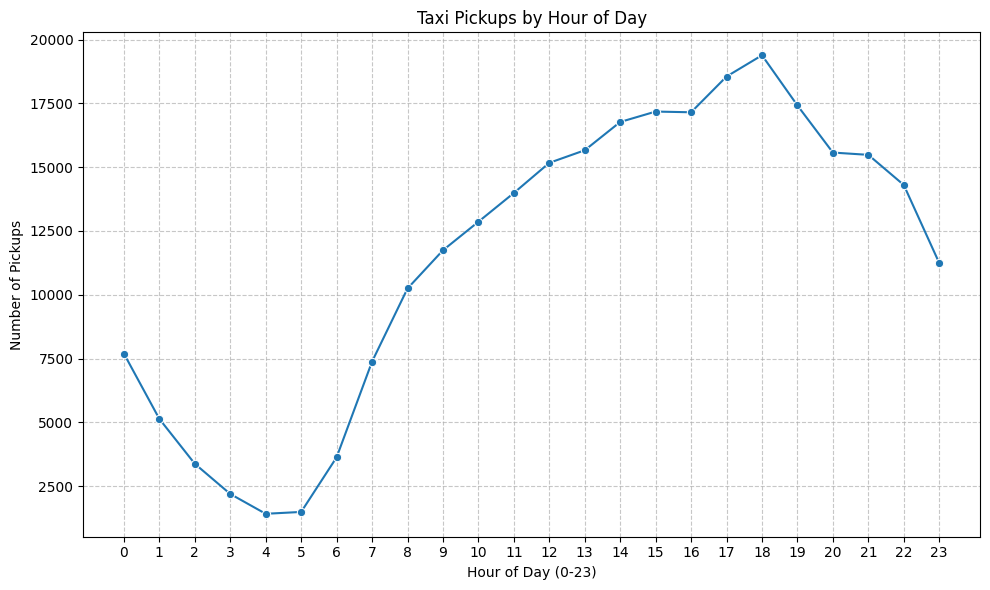

In [31]:
# Find and show the hourly trends in taxi pickups


# Extract the hour from 'tpep_pickup_datetime'
df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour

# Count pickups per hour and sort by hour
hourly_pickups = df_sampled['pickup_hour'].value_counts().sort_index()

# Visualize hourly trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o')
plt.title('Taxi Pickups by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


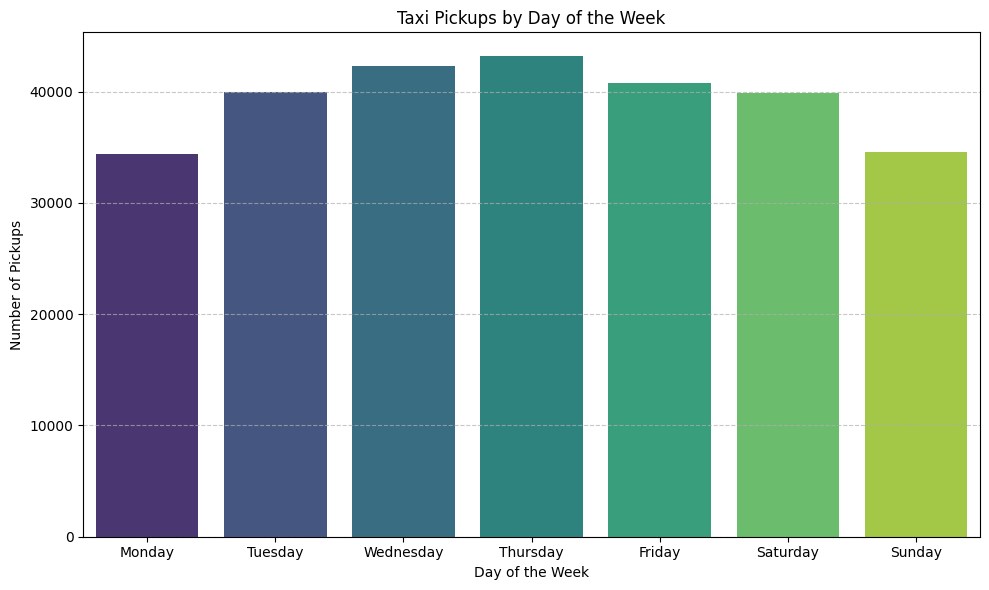

In [32]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract the day of the week (0=Monday, 6=Sunday)
df_sampled['pickup_day_of_week'] = df_sampled['tpep_pickup_datetime'].dt.dayofweek

# Map numerical day of week to names
day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df_sampled['pickup_day_name'] = df_sampled['pickup_day_of_week'].map(day_names)

# Count pickups per day of the week and sort
daily_pickups = df_sampled['pickup_day_name'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Visualize daily trends
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='viridis')
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Number of Pickups per Month:
pickup_month_name
Jan    22288
Feb    21131
Mar    24672
Apr    23803
May    25402
Jun    23895
Jul    20966
Aug    20334
Sep    20094
Oct    25053
Nov    23751
Dec    23658
Name: count, dtype: int64


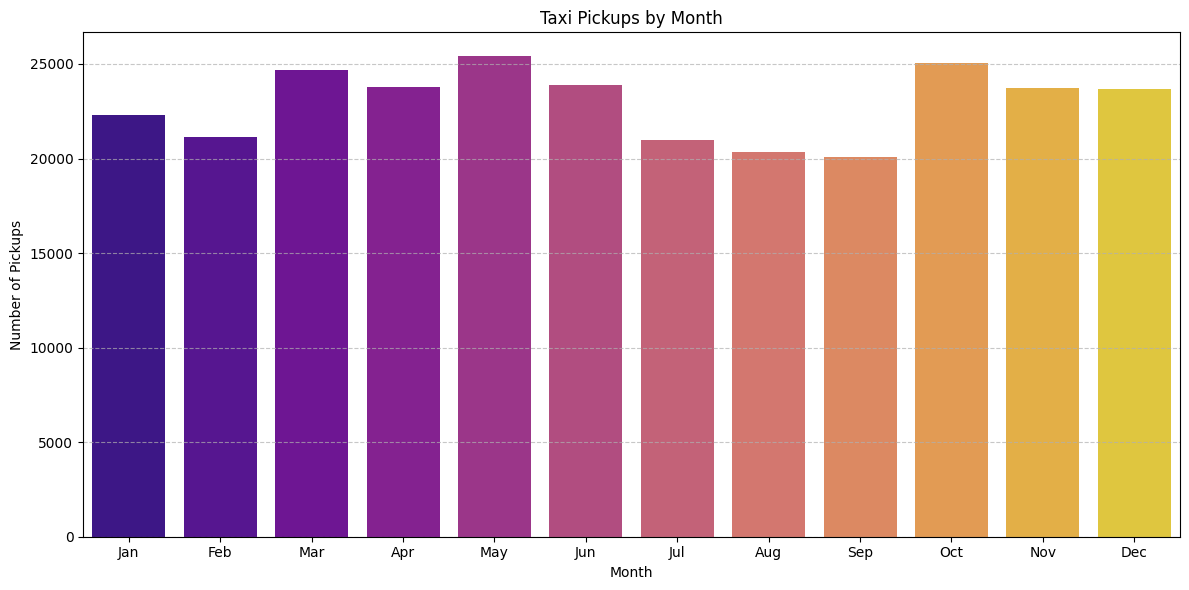

In [33]:
# Show the monthly trends in pickups

# Extract the month number (1=January, 12=December)
df_sampled['pickup_month'] = df_sampled['tpep_pickup_datetime'].dt.month

# Map numerical month to names for better readability
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df_sampled['pickup_month_name'] = df_sampled['pickup_month'].map(month_names)

# Count pickups per month and sort by the numerical month
monthly_pickups = df_sampled['pickup_month_name'].value_counts().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

print("\nNumber of Pickups per Month:")
print(monthly_pickups)

# Visualize monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='plasma')
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [34]:
# Analyse the above parameters
columns_to_check = [
    'fare_amount',
    'tip_amount',
    'total_amount',
    'trip_distance'
]

for col in columns_to_check:
    if col in df_sampled.columns:
        # Check for negative values
        negative_count = (df_sampled[col] < 0).sum()
        if negative_count > 0:
            print(f"'{col}': {negative_count} negative values found.")

        # Check for zero values
        zero_count = (df_sampled[col] == 0).sum()
        if zero_count > 0:
            print(f"'{col}': {zero_count} zero values found.")
    else:
        print(f"Warning: Column '{col}' not found.")


'fare_amount': 193324 negative values found.
'tip_amount': 175820 negative values found.
'total_amount': 197773 negative values found.
'trip_distance': 207899 negative values found.


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes, it is beneficial to create a copy DataFrame leaving out the zero values for trip_distance, fare_amount, and total_amount.Creating a copy DataFrame with these exclusions will give you a cleaner dataset focused on actual, paid taxi trips, which is generally more useful for most analytical tasks and machine learning models.


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [35]:
# Create a df with non zero entries for the selected parameters.

df_sampled_filtered = df_sampled[
    (df_sampled['fare_amount'] != 0) &
    (df_sampled['total_amount'] != 0) &
    (df_sampled['trip_distance'] != 0)
].copy()


initial_rows = len(df_sampled_filtered)
df_sampled_filtered = df_sampled_filtered[df_sampled_filtered['total_amount'] >= 0].copy()
print(f"Removed {initial_rows - len(df_sampled_filtered)} rows with negative 'total_amount'.")


Removed 197773 rows with negative 'total_amount'.


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Monthly Revenue Trend:
month_name  total_amount
       Jan   6495.626658
       Feb   6036.684107
       Mar   7680.058241
       Apr   7786.290406
       May   8771.609536
       Jun   8253.721332
       Jul   7033.418065
       Aug   6998.714618
       Sep   7520.582907
       Oct   8963.660572
       Nov   7612.491975
       Dec   7784.243534


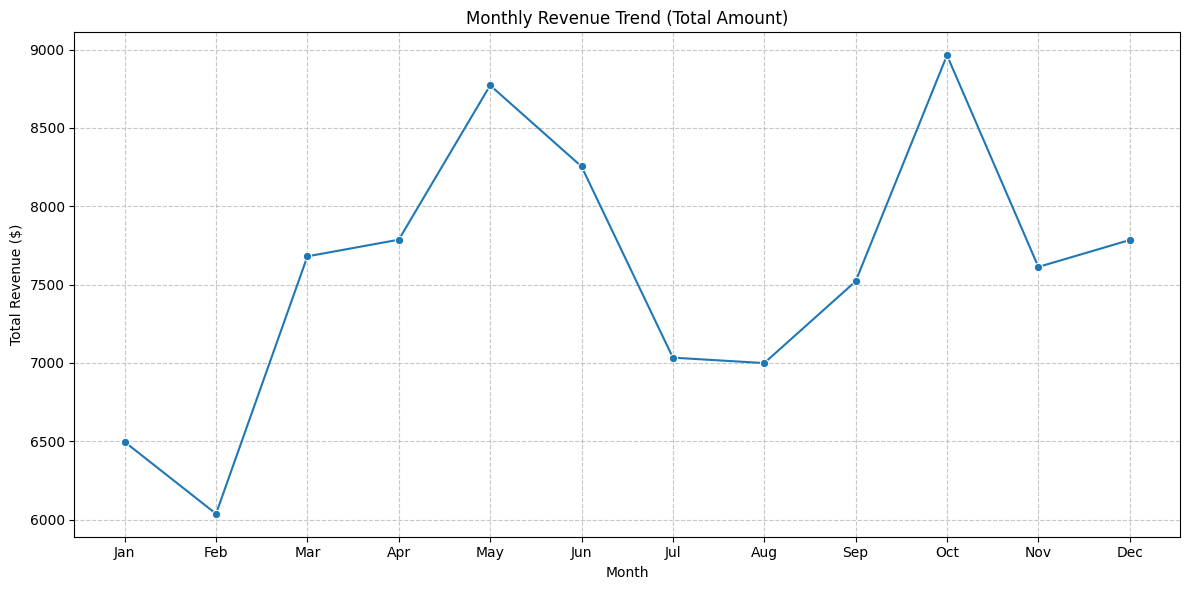

In [36]:
# Group data by month and analyse monthly revenue
# Extract month and map to names
df_sampled_filtered['pickup_month'] = df_sampled_filtered['tpep_pickup_datetime'].dt.month
month_names = {i: pd.to_datetime(f'2000-{i}-01').strftime('%b') for i in range(1, 13)} # More robust month name mapping
df_sampled_filtered['pickup_month_name'] = df_sampled_filtered['pickup_month'].map(month_names)

# Group by month and sum total_amount
monthly_revenue = df_sampled_filtered.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue['month_name'] = monthly_revenue['pickup_month'].map(month_names)
monthly_revenue = monthly_revenue.sort_values(by='pickup_month')

# Print monthly revenue
print("Monthly Revenue Trend:")
print(monthly_revenue[['month_name', 'total_amount']].to_string(index=False))

# Visualize monthly revenue
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_name', y='total_amount', data=monthly_revenue, marker='o', palette='viridis')
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Proportion of Revenue by Quarter:
 pickup_quarter  total_amount  proportion
              1  20212.369005   22.226757
              2  24811.621274   27.284377
              3  21552.715590   23.700684
              4  24360.396080   26.788182


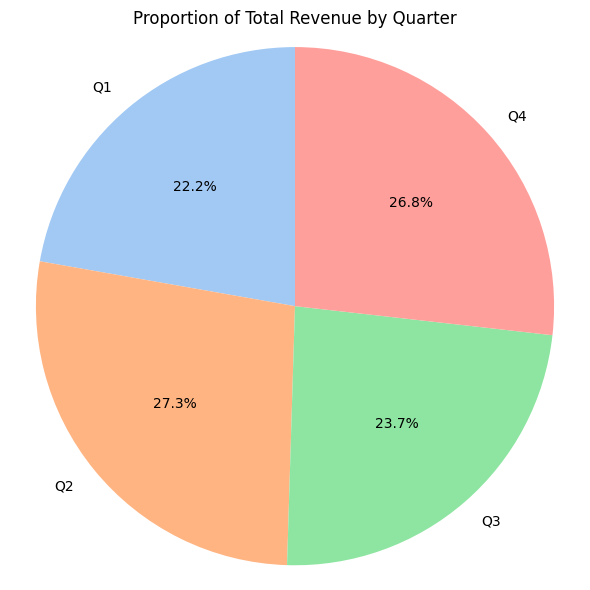

In [37]:
# Calculate proportion of each quarter
# Extract quarter and calculate quarterly revenue
df_sampled_filtered['pickup_quarter'] = df_sampled_filtered['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df_sampled_filtered.groupby('pickup_quarter')['total_amount'].sum().reset_index()

# Calculate total revenue and proportion
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

# Print proportions
print("Proportion of Revenue by Quarter:")
print(quarterly_revenue[['pickup_quarter', 'total_amount', 'proportion']].to_string(index=False))

# Visualize proportions with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue['proportion'], labels=[f'Q{q}' for q in quarterly_revenue['pickup_quarter']],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Total Revenue by Quarter')
plt.axis('equal')
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

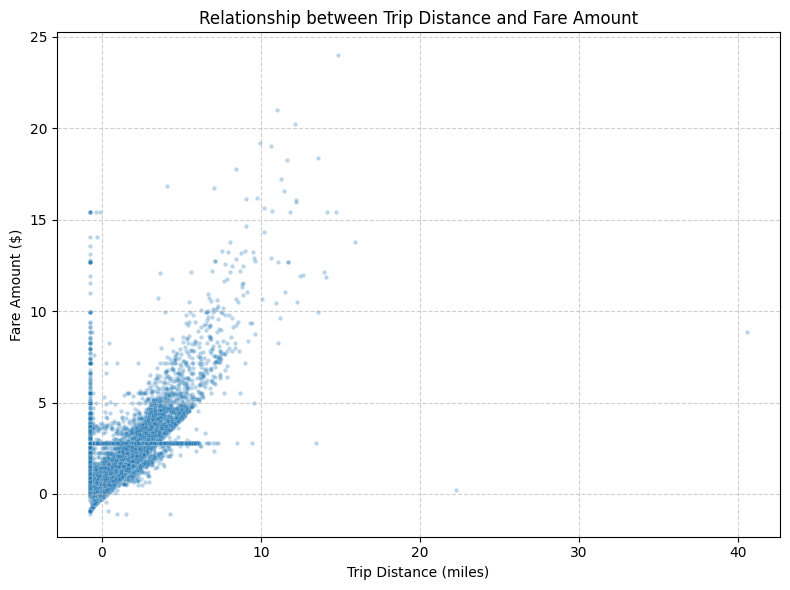

Correlation between trip_distance and fare_amount: 0.8268


In [38]:
# Show how trip fare is affected by distance
# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_sampled_filtered, alpha=0.3, s=10)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Find the correlation value
correlation = df_sampled_filtered['trip_distance'].corr(df_sampled_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [39]:
df_sampled_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77274 entries, 0 to 284491
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               77274 non-null  int64         
 1   tpep_pickup_datetime   77274 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  77274 non-null  object        
 3   passenger_count        77274 non-null  float64       
 4   trip_distance          77274 non-null  float64       
 5   RatecodeID             77274 non-null  float64       
 6   store_and_fwd_flag     77274 non-null  object        
 7   PULocationID           77274 non-null  int64         
 8   DOLocationID           77274 non-null  int64         
 9   payment_type           77274 non-null  int64         
 10  fare_amount            77274 non-null  float64       
 11  extra                  77274 non-null  float64       
 12  mta_tax                77274 non-null  float64       
 13  tip_a

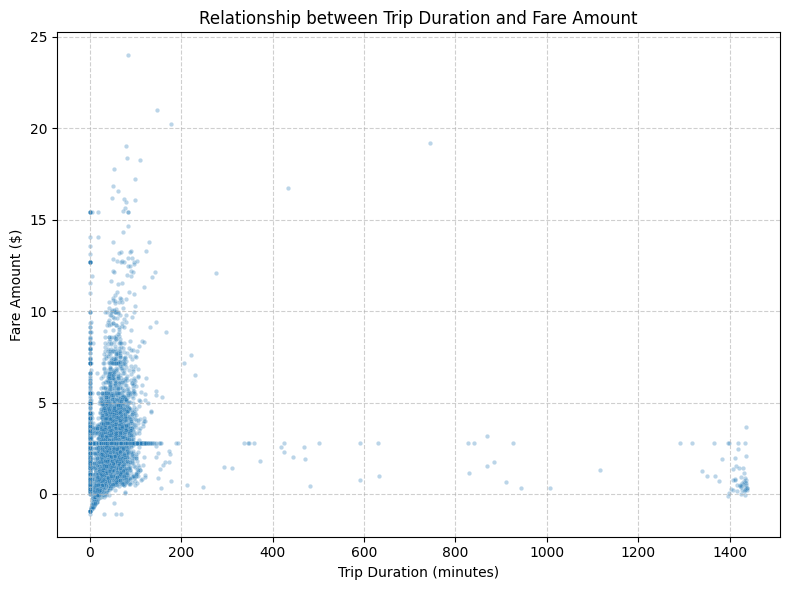

In [40]:
# Ensure datetime columns are correctly converted and trip_duration is calculated
if 'tpep_pickup_datetime' in df_sampled_filtered.columns and 'tpep_dropoff_datetime' in df_sampled_filtered.columns:
    # Convert both columns to datetime, coercing errors, then drop rows with any NaT
    df_sampled_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_sampled_filtered['tpep_pickup_datetime'], errors='coerce')
    df_sampled_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_sampled_filtered['tpep_dropoff_datetime'], errors='coerce')
    df_sampled_filtered.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

    # Calculate trip_duration in minutes
    df_sampled_filtered['trip_duration'] = (df_sampled_filtered['tpep_dropoff_datetime'] - df_sampled_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60

    # Filter out non-positive trip durations for meaningful analysis
    df_sampled_filtered = df_sampled_filtered[df_sampled_filtered['trip_duration'] > 0].copy()
else:
    print("Error: 'tpep_pickup_datetime' or 'tpep_dropoff_datetime' columns not found. Cannot calculate 'trip_duration'.")
    exit()

# Visualize the relationship between trip_duration and fare_amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_sampled_filtered, alpha=0.3, s=10)
plt.title('Relationship between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

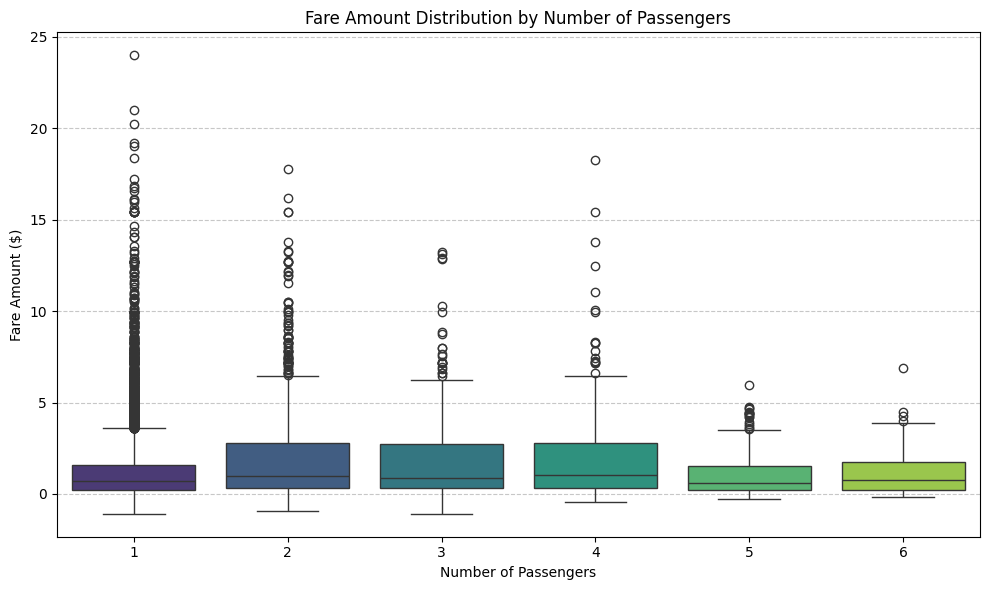

In [41]:
# Show relationship between fare and number of passengers
df_sampled_filtered['passenger_count'] = df_sampled_filtered['passenger_count'].astype(int)

# Visualize the relationship using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_sampled_filtered, palette='viridis')
plt.title('Fare Amount Distribution by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


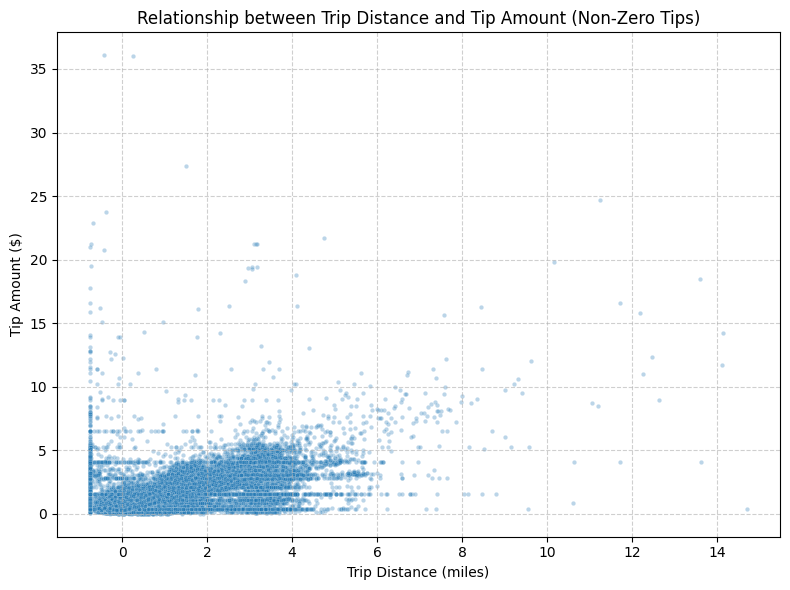

In [42]:
# Show relationship between tip and trip distance

df_tips_non_zero = df_sampled_filtered[df_sampled_filtered['tip_amount'] > 0].copy()

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_tips_non_zero, alpha=0.3, s=10)
plt.title('Relationship between Trip Distance and Tip Amount (Non-Zero Tips)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
              Count  Proportion (%)
payment_type                       
Credit Card   66304       85.842644
Cash          10251       13.271793
Dispute         475        0.614974
No Charge       209        0.270589


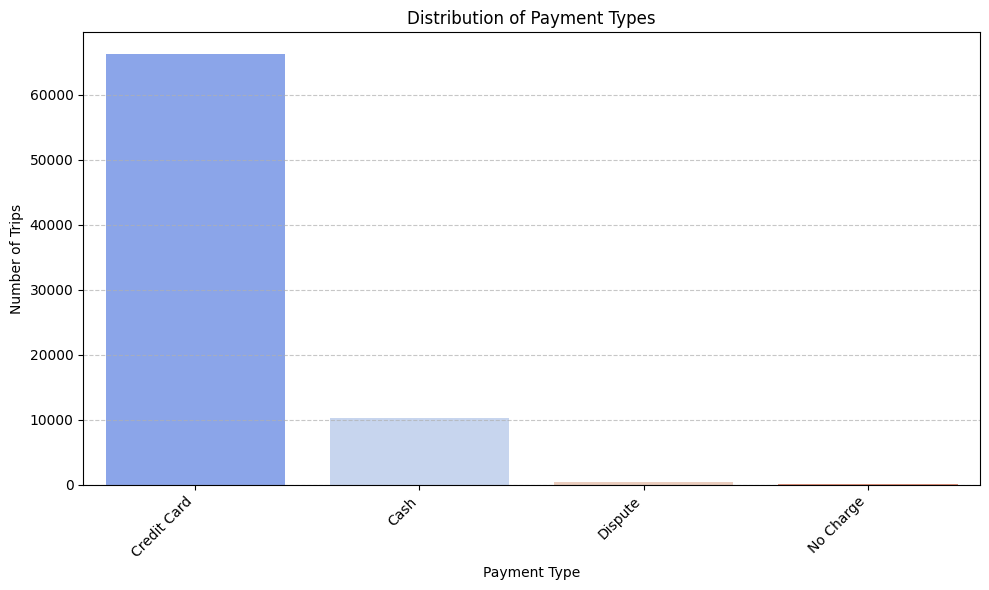

In [43]:
# Analyse the distribution of different payment types (payment_type).

payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Get counts and map to names
payment_type_counts_named = df_sampled_filtered['payment_type'].value_counts().rename(index=payment_type_map)

# Calculate proportions
total_trips = payment_type_counts_named.sum()
payment_type_proportions = (payment_type_counts_named / total_trips) * 100

# Display distribution
print("Payment Type Distribution:")
payment_distribution_df = pd.DataFrame({
    'Count': payment_type_counts_named,
    'Proportion (%)': payment_type_proportions
}).sort_values(by='Count', ascending=False)
print(payment_distribution_df.to_string())

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts_named.index, y=payment_type_counts_named.values, palette='coolwarm')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [44]:
!pip install geopandas

In [45]:
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [46]:
shapefile_folder_path = '/content/drive/MyDrive/Colab Notebooks/trip_records/taxi_zones'
shapefile_name = 'taxi_zones.shp' # The main shapefile

full_shapefile_path = os.path.join(shapefile_folder_path, shapefile_name)

print(f"\nAttempting to read shapefile from: {full_shapefile_path}")


Attempting to read shapefile from: /content/drive/MyDrive/Colab Notebooks/trip_records/taxi_zones/taxi_zones.shp


In [47]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(full_shapefile_path)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

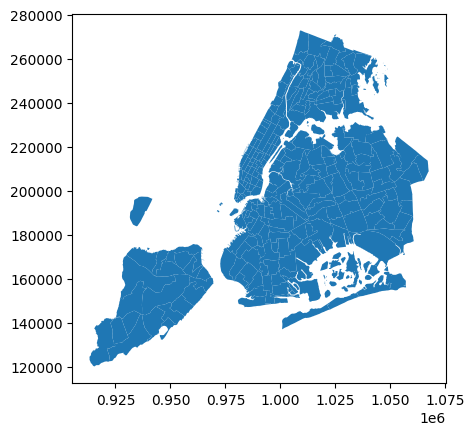

In [48]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [49]:
# Merge zones and trip records using locationID and PULocationID

zones['LocationID'] = zones['LocationID'].astype(int)
df_sampled_filtered['PULocationID'] = df_sampled_filtered['PULocationID'].astype(int)

# Merge the trip data with zone information based on pickup location
df_merged_pickup = pd.merge(
    df_sampled_filtered,
    zones,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

print("Merged trip data with pickup zone information.")
print(df_merged_pickup.head())

Merged trip data with pickup zone information.
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   
2         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   
3         2  2023-01-01 00:44:09   2023-01-01 01:01:17                1   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0       0.949143         1.0                  N           138           256   
1       0.807907         1.0                  N           246            37   
2      -0.061576         1.0                  N            79           256   
3       0.927074         1.0                  N           132            95   
4      -0.145435         1.0                  N            79           186   

   payment_type  ...  picku

In [50]:
negative_distance_count = df_merged_pickup[df_merged_pickup['trip_distance'] < 0].shape[0]
print(f"Number of rows with negative trip_distance: {negative_distance_count}")

zero_distance_count = df_merged_pickup[df_merged_pickup['trip_distance'] == 0].shape[0]
print(f"Number of rows with zero trip_distance: {zero_distance_count}")


negative_duration_count = df_merged_pickup[df_merged_pickup['trip_duration'] < 0].shape[0]
print(f"Number of rows with negative trip_duration: {negative_duration_count}")

zero_duration_count = df_merged_pickup[df_merged_pickup['trip_duration'] == 0].shape[0]
print(f"Number of rows with zero trip_duration: {zero_duration_count}")

Number of rows with negative trip_distance: 15867
Number of rows with zero trip_distance: 0
Number of rows with negative trip_duration: 0
Number of rows with zero trip_duration: 0


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [51]:
# Group data by location and calculate the number of trips

# Group by 'PULocationID' and count trips
trips_per_pickup_location = df_merged_pickup.groupby('PULocationID').size().reset_index(name='number_of_trips')

# Sort by number of trips in descending order
trips_per_pickup_location = trips_per_pickup_location.sort_values(by='number_of_trips', ascending=False)

print("List of All Pickup Location IDs and Their Total Number of Trips:")
print(trips_per_pickup_location.to_string(index=False))

#print("Top 10 Pickup Locations by Number of Trips:")
#print(trips_per_pickup_location.head(10).to_string(index=False))

#print("\nBottom 10 Pickup Locations by Number of Trips:")
#print(trips_per_pickup_location.tail(10).to_string(index=False))


List of All Pickup Location IDs and Their Total Number of Trips:
 PULocationID  number_of_trips
          132            13574
          138             9166
          161             2637
          230             2460
          186             2393
          162             1964
           68             1893
          236             1674
          237             1650
          170             1619
          163             1588
           48             1493
           79             1450
          249             1407
          234             1406
          142             1365
          164             1303
          231             1292
           70             1165
          140             1138
          239             1121
          246             1095
          100             1033
          107             1017
          141              917
           43              890
          263              882
           90              850
          238              839
     

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [52]:
# Merge trip counts back to the zones GeoDataFrame

zones['LocationID'] = zones['LocationID'].astype(int)
trips_per_pickup_location['PULocationID'] = trips_per_pickup_location['PULocationID'].astype(int)

# Merge trip counts into the zones GeoDataFrame using a left merge
zones_with_trip_counts = pd.merge(
    zones,
    trips_per_pickup_location,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

# Fill NaN values (for zones with no trips) with 0 and convert to integer
zones_with_trip_counts['number_of_trips'] = zones_with_trip_counts['number_of_trips'].fillna(0).astype(int)

# Drop the redundant 'PULocationID' column that resulted from the merge
if 'PULocationID' in zones_with_trip_counts.columns:
    zones_with_trip_counts = zones_with_trip_counts.drop(columns=['PULocationID'])

# Display the head of the updated GeoDataFrame
print("Zones GeoDataFrame with 'number_of_trips' column:")
print(zones_with_trip_counts.head())


Zones GeoDataFrame with 'number_of_trips' column:
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   number_of_trips  
0               33  
1                0  
2  

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

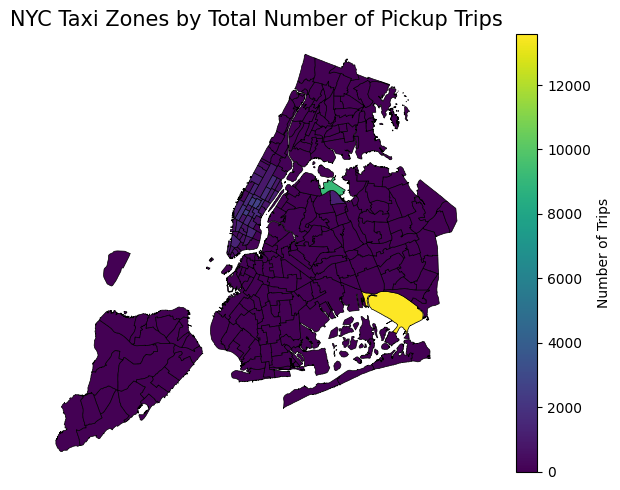

In [54]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Plot the color-coded map
zones_with_trip_counts.plot(
    column='number_of_trips',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
    cmap='viridis',
    edgecolor='black',
    linewidth=0.5
)

# Set title and remove axes
ax.set_title('NYC Taxi Zones by Total Number of Pickup Trips', fontsize=15)
ax.set_axis_off()

# Display the plot
plt.tight_layout()
plt.show()

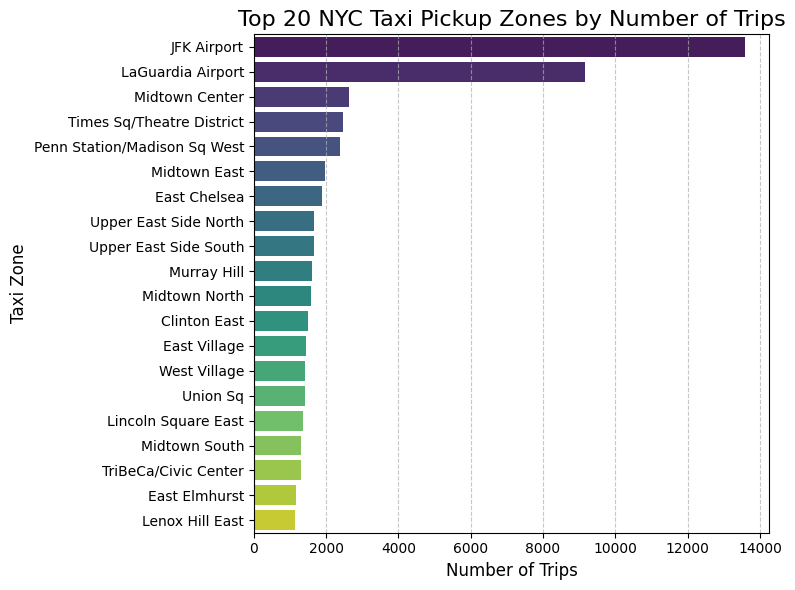

In [55]:
# Sort the GeoDataFrame and select the top 20 zones for plotting
top_n = 20
sorted_top_zones = zones_with_trip_counts.sort_values(by='number_of_trips', ascending=False).head(top_n)

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x='number_of_trips',
    y='zone',
    data=sorted_top_zones,
    palette='viridis'
)

plt.title(f'Top {top_n} NYC Taxi Pickup Zones by Number of Trips', fontsize=16)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Taxi Zone', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


Busiest Hours: Pickups are highest in the late afternoon/early evening (6-7 PM) and also see a boost around lunchtime (1-2 PM). The lowest activity is in the very early morning (3-5 AM).

Busiest Days: Wednesday, Thursday, and Friday are the busiest days for taxi pickups. Monday and Sunday show the lowest activity.

Busiest Months: May and October are the peak months for taxi pickups. Spring months (March, April, June) also show high volumes.

The number of taxi pickups suggests that May and October are likely the months with the highest revenue.

Looking at total revenue by quarter, Quarter 2 (April-June) and Quarter 4 (Oct-Dec) are the periods where the most revenue is collected.


Quarter 1 (Q1: Jan-Mar) contributed 22.2%.

Quarter 2 (Q2: April-June) generated the highest proportion of revenue at 27.3%.

Quarter 4 (Q4: Oct-Dec) was very close behind, contributing 26.8%.

Quarter 3 (Q3: July-Sept) accounted for 23.7%, and

This indicates that while revenue is relatively consistent, Q2 and Q4 are the strongest, and Q1 is the quarter with the lowest proportion of revenue among the four.

Trip Distance: Longer trips mean higher fares.

Trip Duration: Longer rides (in time) also mean higher fares.

Passenger Counts: The number of passengers does not significantly affect the fare.


The scatter plot shows a positive correlation between trip_distance and tip_amount.
This indicates that generally, as the trip_distance increases, the tip_amount given by passengers also tends to increase.
While there's a lot of variability in tipping behavior (some short trips get relatively high tips, and some long trips get low tips), the overall trend suggests that longer taxi rides are more likely to receive larger tips.


The busiest zones for taxi pickups are primarily JFK Airport and LaGuardia Airport.
Following the airports, key areas in Midtown Manhattan (like Midtown Center, Times Square, Penn Station, Midtown East) and parts of the Upper East Side are also very active.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [56]:
# Find routes which have the slowest speeds at different times of the day
# Data preparation: Extract hour and filter valid trips
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour

df_filtered = df_merged_pickup[
    (df_merged_pickup['trip_distance'] > 0) & (df_merged_pickup['trip_duration'] > 0)
].copy()

# 2. Group by route (PU-DO) and hour, calculate average distance, duration, and trip count
route_hourly_stats = df_filtered.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_trip_distance=('trip_distance', 'mean'),
    avg_trip_duration_minutes=('trip_duration', 'mean'),
    num_trips=('trip_distance', 'count')
).reset_index()

# 3. Calculate speed in MPH (assuming trip_duration is in minutes)
# Added a small epsilon to prevent division by zero for robustness.
route_hourly_stats['speed_mph'] = route_hourly_stats['avg_trip_distance'] / ((route_hourly_stats['avg_trip_duration_minutes'] / 60) + 1e-6)

# 4. Identify slowest routes: Filter for enough trips and sort
min_trips = 10
slowest_routes = route_hourly_stats[
    route_hourly_stats['num_trips'] >= min_trips
].sort_values(by='speed_mph', ascending=True)

# 5. Merge zone names for readability (if 'zones' GeoDataFrame is available)
if 'zones' in locals() and isinstance(zones, gpd.GeoDataFrame):
    zones['LocationID'] = zones['LocationID'].astype(int)

    # Prepare zone info for merging
    pickup_zones_info = zones[['LocationID', 'zone', 'borough']].rename(
        columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone', 'borough': 'pickup_borough'}
    )
    dropoff_zones_info = zones[['LocationID', 'zone', 'borough']].rename(
        columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}
    )

    # Merge pickup and drop-off zone names
    slowest_routes = slowest_routes.merge(pickup_zones_info, on='PULocationID', how='left')
    slowest_routes = slowest_routes.merge(dropoff_zones_info, on='DOLocationID', how='left')

    # Display top 10 slowest routes with names
    display_cols = ['pickup_zone', 'pickup_borough', 'dropoff_zone', 'dropoff_borough',
                    'pickup_hour', 'avg_trip_distance', 'avg_trip_duration_minutes',
                    'speed_mph', 'num_trips']
    print("Top 10 Slowest Routes:")
    print(slowest_routes[display_cols].head(10).to_string(index=False))



Top 10 Slowest Routes:
                 pickup_zone pickup_borough          dropoff_zone dropoff_borough  pickup_hour  avg_trip_distance  avg_trip_duration_minutes  speed_mph  num_trips
Penn Station/Madison Sq West      Manhattan        Yorkville East       Manhattan           19           0.091135                  27.818333   0.196564         10
Penn Station/Madison Sq West      Manhattan        Yorkville East       Manhattan           21           0.111658                  22.125000   0.302801         10
Penn Station/Madison Sq West      Manhattan        Yorkville West       Manhattan           20           0.115771                  22.290909   0.311617         11
                East Chelsea      Manhattan Upper East Side North       Manhattan           14           0.181574                  34.930303   0.311890         11
   Times Sq/Theatre District      Manhattan  TriBeCa/Civic Center       Manhattan           17           0.163518                  30.261667   0.324208         10

How does identifying high-traffic, high-demand routes help us?

Operational Efficiency:

Place more cabs where and when they're needed to reduce waiting times and idle drivers.
Find and avoid traffic jams (bottlenecks) by guiding drivers to faster routes.

Pricing Strategies:

Use surge pricing on busy routes during peak times to increase revenue and encourage more drivers.
Offer discounts on less busy routes to attract more riders.

Customer Experience:

Customers get faster cabs and quicker, more predictable rides.
This leads to happier customers and a more reliable service.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Number of trips per hour:
 pickup_hour
0     2437
1     1399
2      889
3      589
4      542
5      658
6     1076
7     1661
8     2346
9     2815
10    3143
11    3557
12    4005
13    4319
14    4783
15    4911
16    5438
17    5664
18    5325
19    4773
20    4308
21    4355
22    4437
23    3820

Busiest Hour: 17:00 with 5,664 trips


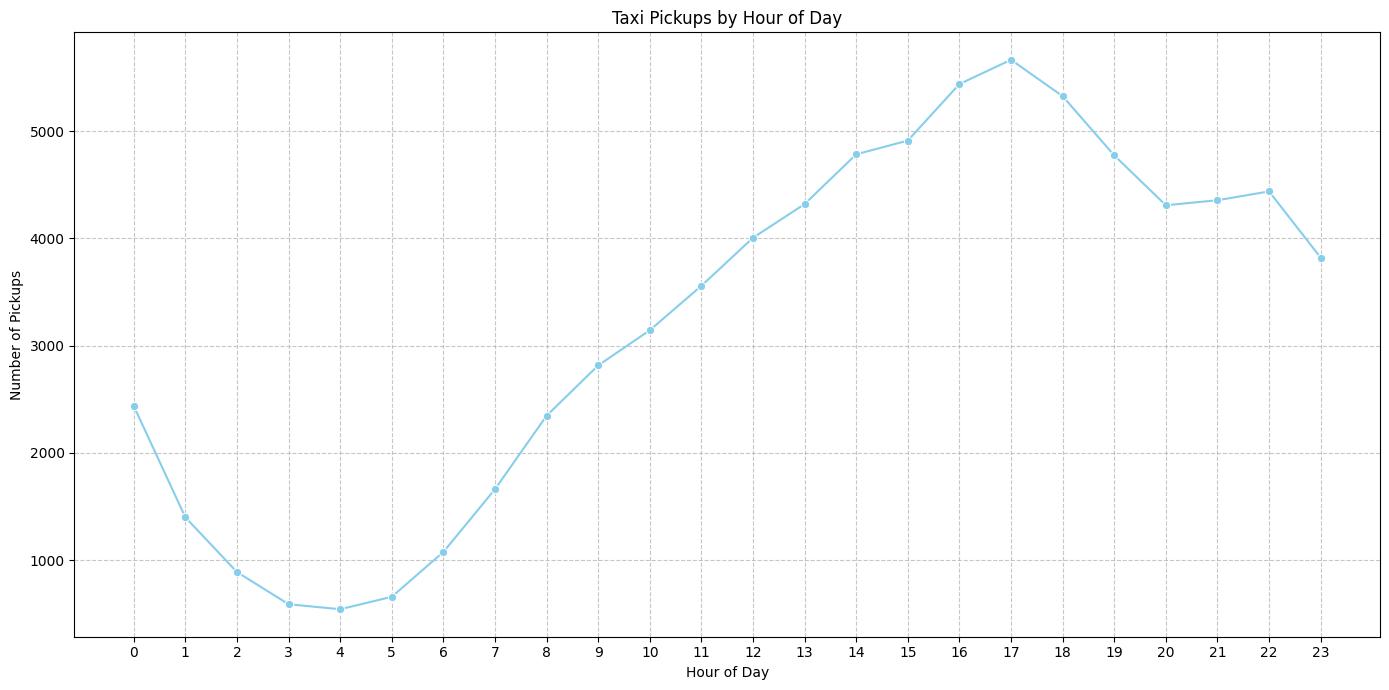

In [57]:
# Visualise the number of trips per hour and find the busiest hour

# Extract hour from pickup datetime
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour

# Count trips per hour
trips_per_hour = df_merged_pickup['pickup_hour'].value_counts().sort_index()

# Find busiest hour
busiest_hour = trips_per_hour.idxmax()
trips_in_busiest_hour = trips_per_hour.max()

print("Number of trips per hour:\n", trips_per_hour.to_string())
print(f"\nBusiest Hour: {busiest_hour:02d}:00 with {trips_in_busiest_hour:,} trips")

# Visualize trips per hour
plt.figure(figsize=(14, 7))
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, marker='o', color='skyblue')
plt.title('Taxi Pickups by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Actual number of trips for the five busiest hours:
pickup_hour
17    755200
16    725067
18    710000
15    654800
14    637733


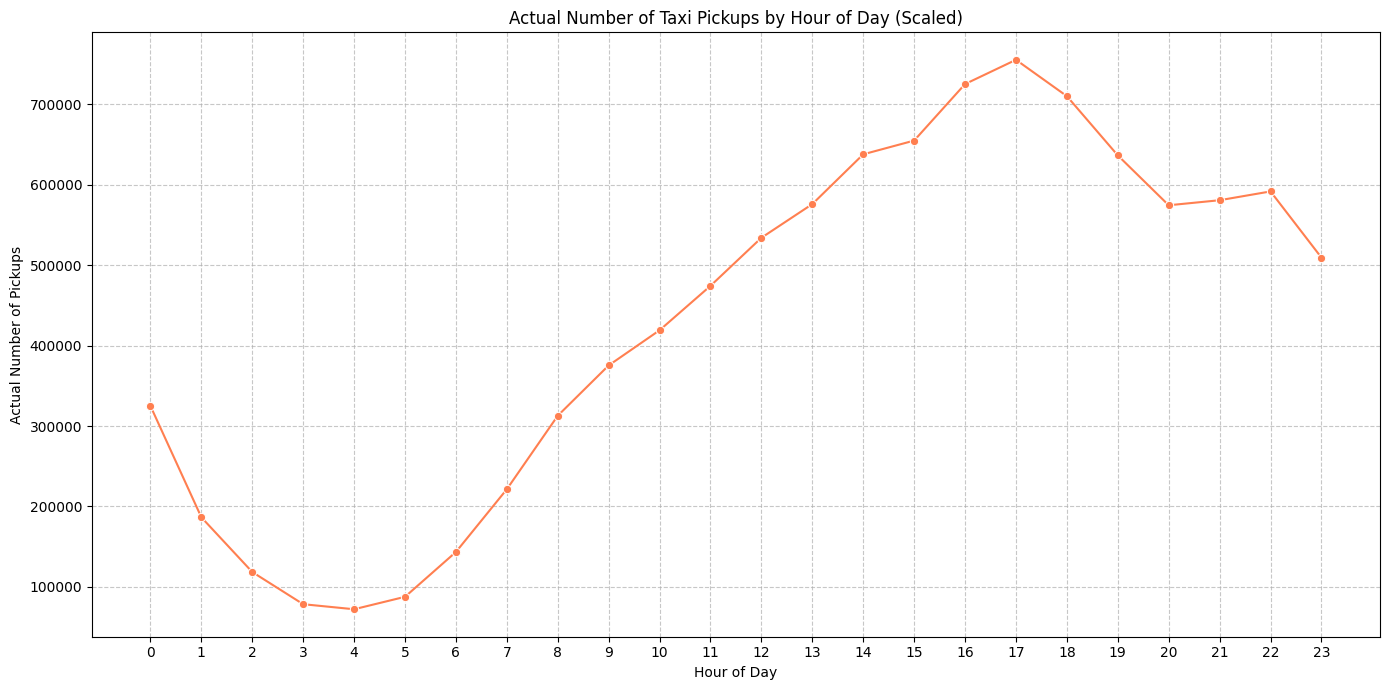

In [58]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.0075

# Calculate trips per hour from the sampled data
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour
trips_per_hour_sampled = df_merged_pickup['pickup_hour'].value_counts().sort_index()

# Scale up to find actual trips per hour
actual_trips_per_hour = (trips_per_hour_sampled / sample_fraction).round().astype(int)

# Find the five busiest hours from the actual data
five_busiest_hours = actual_trips_per_hour.nlargest(5)

print("Actual number of trips for the five busiest hours:")
print(five_busiest_hours.to_string())

# Visualize actual trips per hour
plt.figure(figsize=(14, 7))
sns.lineplot(x=actual_trips_per_hour.index, y=actual_trips_per_hour.values, marker='o', color='coral')
plt.title('Actual Number of Taxi Pickups by Hour of Day (Scaled)')
plt.xlabel('Hour of Day')
plt.ylabel('Actual Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation
plt.tight_layout()
plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

Hourly Traffic Patterns (Weekdays vs. Weekends):
 pickup_hour      0       1      2      3      4      5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23
day_type                                                                                                                                                                                               
Weekday      178800   85333  43600  29600  35333  63467  113333  183067  261067  305200  329067  365600  401333  429867  476267  480533  553733  586000  552933  483067  429333  437067  430000  357333
Weekend      146133  101200  74933  48933  36933  24267   30133   38400   51733   70133   90000  108667  132667  146000  161467  174267  171333  169200  157067  153333  145067  143600  161600  152000


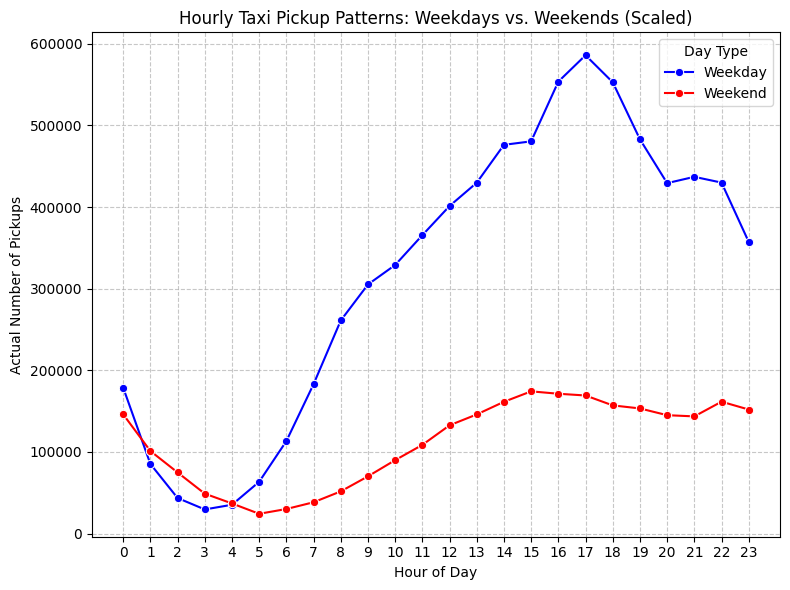

In [59]:
# Compare traffic trends for the week days and weekends
# Prepare data: extract hour and day type (weekday/weekend)
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour
df_merged_pickup['day_type'] = df_merged_pickup['tpep_pickup_datetime'].dt.dayofweek.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

# Calculate trips per hour for weekdays and weekends
hourly_traffic = df_merged_pickup.groupby(['day_type', 'pickup_hour']).size().unstack(fill_value=0)

# Scale up if sample_fraction is available, otherwise use raw counts
if 'sample_fraction' in locals() and sample_fraction > 0:
    plot_data = (hourly_traffic / sample_fraction).round().astype(int)
    y_label = 'Actual Number of Pickups'
    title_suffix = ' (Scaled)'
else:
    plot_data = hourly_traffic
    y_label = 'Number of Pickups'
    title_suffix = ' (Sampled)'

print("Hourly Traffic Patterns (Weekdays vs. Weekends):\n", plot_data.to_string())

# Visualize the patterns
plt.figure(figsize=(8, 6))
sns.lineplot(x=plot_data.columns, y=plot_data.loc['Weekday'], marker='o', label='Weekday', color='blue')
sns.lineplot(x=plot_data.columns, y=plot_data.loc['Weekend'], marker='o', label='Weekend', color='red')

plt.title(f'Hourly Taxi Pickup Patterns: Weekdays vs. Weekends{title_suffix}')
plt.xlabel('Hour of Day')
plt.ylabel(y_label)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Weekdays are far busier than weekends, especially in the evenings.
Weekday rushes: Big evening peak (6-7 PM) and a smaller morning peak (8-9 AM) for commutes.
Weekend rhythm: Slower mornings, building to an afternoon peak (3-6 PM), generally steadier than weekdays.
Quiet times: Both weekdays and weekends are very quiet between 3 AM and 5 AM.


How Finding Busy/Quiet Hours Helps:

Better Cab Placement: Put more taxis out during busy hours/days (like weekday evenings) and fewer during quiet times (like early mornings) to maximize profits and minimize idle time.
Smart Pricing: Charge more during peak demand (e.g., surge pricing on weekday evenings) and offer discounts during slow hours to attract riders.
Improved Customer Service: Customers get faster pickups and smoother rides when cabs are properly positioned for demand.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.


Zone ID to Name/Borough mapping created.

--- Overall Top 10 Pickup Zones ---
                   zone_name borough_name  num_pickups_sampled
                 JFK Airport       Queens                13574
           LaGuardia Airport       Queens                 9166
              Midtown Center    Manhattan                 2637
   Times Sq/Theatre District    Manhattan                 2460
Penn Station/Madison Sq West    Manhattan                 2393
                Midtown East    Manhattan                 1964
                East Chelsea    Manhattan                 1893
       Upper East Side North    Manhattan                 1674
       Upper East Side South    Manhattan                 1650
                 Murray Hill    Manhattan                 1619


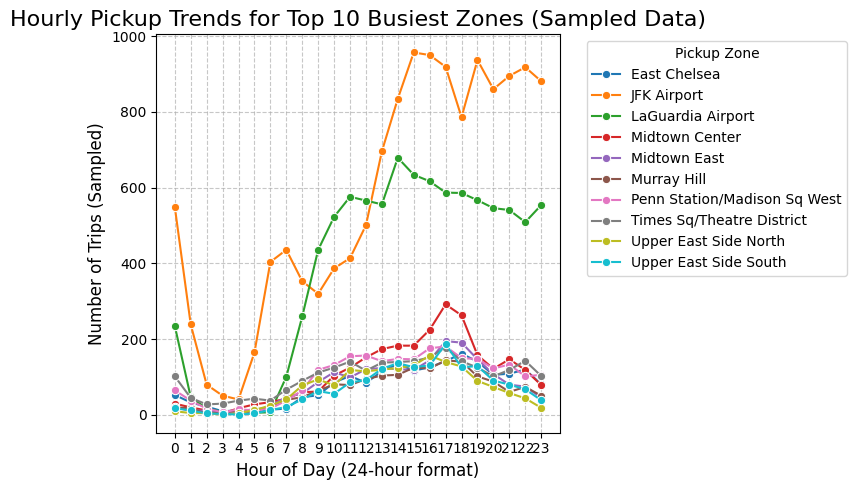


--- Overall Top 10 Dropoff Zones ---
                zone_name borough_name  num_dropoffs_sampled
        LaGuardia Airport       Queens                  3182
              JFK Airport       Queens                  2755
Times Sq/Theatre District    Manhattan                  2446
    Upper East Side North    Manhattan                  1913
           Midtown Center    Manhattan                  1853
    Upper West Side South    Manhattan                  1625
             Clinton East    Manhattan                  1568
     TriBeCa/Civic Center    Manhattan                  1530
             Midtown East    Manhattan                  1428
    Upper West Side North    Manhattan                  1389


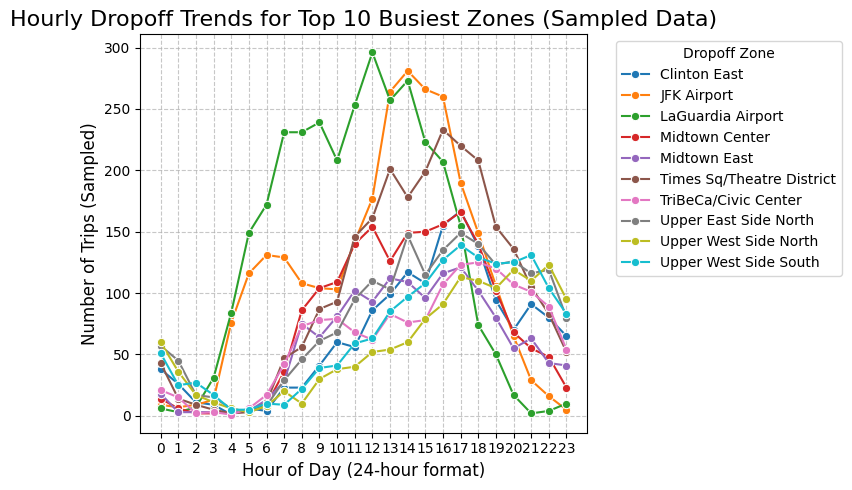

In [61]:
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour

# --- Prepare the zone mapping dictionary once ---
zone_id_to_name_map = {}
zone_id_to_borough_map = {}
zone_names_available = False

if 'zones' in locals() and isinstance(zones, gpd.GeoDataFrame):
    zones['LocationID'] = zones['LocationID'].astype(int) # Ensure type consistency
    zone_id_to_name_map = zones.set_index('LocationID')['zone'].to_dict()
    zone_id_to_borough_map = zones.set_index('LocationID')['borough'].to_dict()
    zone_names_available = True
    print("\nZone ID to Name/Borough mapping created.")
else:
    print("\nWarning: 'zones' GeoDataFrame not found. Zone names/boroughs will not be displayed.")


# Label for plots and prints (since we are explicitly NOT scaling)
y_label_text = 'Number of Trips (Sampled)' # Changed from 'Pickups' to 'Trips' for generality
title_suffix = ' (Sampled Data)'


# --- Function to analyze and plot top zones (getting names from IDs) ---
def analyze_and_plot_zones_from_ids(df, location_id_col, is_pickup=True, id_to_name_map=None, id_to_borough_map=None):
    count_col_prefix = 'num_pickups' if is_pickup else 'num_dropoffs'
    full_col_name = location_id_col # This will be PULocationID or DOLocationID

    # Group by LocationID and hour, count trips
    hourly_counts = df.groupby([full_col_name, 'pickup_hour']).size().reset_index(name=f'{count_col_prefix}_sampled')

    # Find top 10 zones by total sampled trips
    total_counts_by_zone = hourly_counts.groupby(full_col_name)[f'{count_col_prefix}_sampled'].sum().nlargest(10)
    top_10_ids = total_counts_by_zone.index.tolist()

    print(f"\n--- Overall Top 10 {'Pickup' if is_pickup else 'Dropoff'} Zones ---")

    # Create a display DataFrame for the table output
    display_df = total_counts_by_zone.reset_index()
    display_df.columns = ['LocationID', f'{count_col_prefix}_sampled']

    # Add zone names and borough names to the display_df if maps are available
    if id_to_name_map and id_to_borough_map:
        display_df['zone_name'] = display_df['LocationID'].map(id_to_name_map)
        display_df['borough_name'] = display_df['LocationID'].map(id_to_borough_map)
        # Reorder columns for display
        display_df = display_df[['zone_name', 'borough_name', f'{count_col_prefix}_sampled']]
        print(display_df.to_string(index=False))
    else:
        # If maps not available, just print IDs and counts
        print(display_df.to_string(index=False))


    # Filter hourly data for only the top 10 zones
    filtered_hourly_data = hourly_counts[hourly_counts[full_col_name].isin(top_10_ids)].copy() # Use .copy()


    # Map LocationIDs to zone names for the 'hue' in the plot
    if id_to_name_map:
        filtered_hourly_data['zone_name_for_plot'] = filtered_hourly_data[full_col_name].map(id_to_name_map)
        plot_hue_col = 'zone_name_for_plot'
    else:
        plot_hue_col = full_col_name


    # --- Plotting ---
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=filtered_hourly_data, x='pickup_hour', y=f'{count_col_prefix}_sampled', hue=plot_hue_col,
        marker='o', palette='tab10'
    )
    plt.title(f'Hourly {"Pickup" if is_pickup else "Dropoff"} Trends for Top 10 Busiest Zones{title_suffix}', fontsize=16)
    plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
    plt.ylabel(f'{y_label_text.replace("Pickups", "Dropoffs") if not is_pickup else y_label_text}', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title=f'{"Pickup" if is_pickup else "Dropoff"} Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# --- Execute for Pickups and Dropoffs ---
analyze_and_plot_zones_from_ids(df_merged_pickup, 'PULocationID', is_pickup=True,
                                  id_to_name_map=zone_id_to_name_map, id_to_borough_map=zone_id_to_borough_map)

analyze_and_plot_zones_from_ids(df_merged_pickup, 'DOLocationID', is_pickup=False,
                                  id_to_name_map=zone_id_to_name_map, id_to_borough_map=zone_id_to_borough_map)

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [62]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups and dropoffs per zone
pickup_counts = df_merged_pickup['PULocationID'].value_counts().rename('total_pickups')
dropoff_counts = df_merged_pickup['DOLocationID'].value_counts().rename('total_dropoffs')

# Combine counts
zone_activity = pd.DataFrame({
    'total_pickups': pickup_counts,
    'total_dropoffs': dropoff_counts
}).fillna(0).astype(int) # Fill NaNs with 0 and convert to int

# Calculate ratio (add epsilon to avoid division by zero)
epsilon = 1e-6
zone_activity['pickup_dropoff_ratio'] = zone_activity['total_pickups'] / (zone_activity['total_dropoffs'] + epsilon)

# Merge zone names for readability
zone_names_available = False
if 'zones' in locals() and isinstance(zones, gpd.GeoDataFrame):
    zones['LocationID'] = zones['LocationID'].astype(int)
    zone_activity = zone_activity.merge(zones[['LocationID', 'zone', 'borough']],
                                        left_index=True, right_on='LocationID', how='left')
    zone_names_available = True
    display_cols = ['zone', 'borough', 'total_pickups', 'total_dropoffs', 'pickup_dropoff_ratio']
else:
    display_cols = ['total_pickups', 'total_dropoffs', 'pickup_dropoff_ratio']
    zone_activity.reset_index(inplace=True) # Convert index to column for display if no zone names
    zone_activity.rename(columns={'index': 'LocationID'}, inplace=True)
    display_cols.insert(0, 'LocationID') # Add LocationID to display cols

# Display 10 highest ratios
print("Top 10 Zones with Highest Pickup/Dropoff Ratios (More Pickups):")
print(zone_activity.sort_values(by='pickup_dropoff_ratio', ascending=False)[display_cols].head(10).to_string(index=False))

# Display 10 lowest ratios (exclude zones with 0 pickups AND 0 dropoffs from lowest)
lowest_ratio_zones = zone_activity[
    (zone_activity['total_pickups'] > 0) | (zone_activity['total_dropoffs'] > 0)
]
print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratios (More Dropoffs):")
print(lowest_ratio_zones.sort_values(by='pickup_dropoff_ratio', ascending=True)[display_cols].head(30).to_string(index=False))

Top 10 Zones with Highest Pickup/Dropoff Ratios (More Pickups):
                        zone   borough  total_pickups  total_dropoffs  pickup_dropoff_ratio
               East Elmhurst    Queens           1165              72             16.180555
                 JFK Airport    Queens          13574            2755              4.927042
           LaGuardia Airport    Queens           9166            3182              2.880578
Penn Station/Madison Sq West Manhattan           2393            1062              2.253296
                West Village Manhattan           1407             762              1.846457
                Central Park Manhattan            890             530              1.679245
                    Union Sq Manhattan           1406             894              1.572707
     Greenwich Village South Manhattan            820             571              1.436077
              Midtown Center Manhattan           2637            1853              1.423098
                

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [63]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# 1. Prepare data: Extract hour and filter for night trips
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour
night_hours = [23, 0, 1, 2, 3, 4, 5] # 11 PM to 5 AM
df_night_trips = df_merged_pickup[df_merged_pickup['pickup_hour'].isin(night_hours)]

# 2. Prepare zone name mapping (if 'zones' GeoDataFrame is available)
zone_info = {}
if 'zones' in locals() and isinstance(zones, gpd.GeoDataFrame):
    # Ensure LocationID is integer type
    zones['LocationID'] = zones['LocationID'].astype(int)

    # Handle duplicate LocationIDs before setting index.
    # If there are duplicate LocationIDs, we'll keep the first occurrence.
    # This is a common issue if the shapefile has multiple entries for the same ID,
    # or if it's not truly unique.
    zones_unique_ids = zones.drop_duplicates(subset='LocationID').copy()

    # Now, set index and convert to dictionary
    zone_info = zones_unique_ids.set_index('LocationID')[['zone', 'borough']].to_dict('index')

    print("Zone ID to Name/Borough mapping created.")
else:
    print("Warning: 'zones' data not found. Displaying Location IDs.")

# 3. Find and display Top 10 Night Hour Pickup Zones
night_pu_counts = df_night_trips['PULocationID'].value_counts().nlargest(10).reset_index()
night_pu_counts.columns = ['LocationID', 'Night Pickups']

print("\nTop 10 Night Hour Pickups:")
if zone_info:
    night_pu_counts['Zone Name'] = night_pu_counts['LocationID'].map(lambda x: zone_info.get(x, {'zone': f'ID {x}', 'borough': 'N/A'})['zone'])
    night_pu_counts['Borough'] = night_pu_counts['LocationID'].map(lambda x: zone_info.get(x, {'zone': f'ID {x}', 'borough': 'N/A'})['borough'])
    print(night_pu_counts[['Zone Name', 'Borough', 'Night Pickups']].to_string(index=False))
else:
    print(night_pu_counts.to_string(index=False))

# 4. Find and display Top 10 Night Hour Dropoff Zones
night_do_counts = df_night_trips['DOLocationID'].value_counts().nlargest(10).reset_index()
night_do_counts.columns = ['LocationID', 'Night Dropoffs']

print("\nTop 10 Night Hour Dropoffs:")
if zone_info:
    night_do_counts['Zone Name'] = night_do_counts['LocationID'].map(lambda x: zone_info.get(x, {'zone': f'ID {x}', 'borough': 'N/A'})['zone'])
    night_do_counts['Borough'] = night_do_counts['LocationID'].map(lambda x: zone_info.get(x, {'zone': f'ID {x}', 'borough': 'N/A'})['borough'])
    print(night_do_counts[['Zone Name', 'Borough', 'Night Dropoffs']].to_string(index=False))
else:
    print(night_do_counts.to_string(index=False))


Zone ID to Name/Borough mapping created.

Top 10 Night Hour Pickups:
                   Zone Name   Borough  Night Pickups
                 JFK Airport    Queens           2006
           LaGuardia Airport    Queens            875
                East Village Manhattan            588
                West Village Manhattan            494
             Lower East Side Manhattan            410
                Clinton East Manhattan            399
   Times Sq/Theatre District Manhattan            389
     Greenwich Village South Manhattan            294
Penn Station/Madison Sq West Manhattan            260
                East Chelsea Manhattan            216

Top 10 Night Hour Dropoffs:
            Zone Name   Borough  Night Dropoffs
    LaGuardia Airport    Queens             290
       Yorkville West Manhattan             266
               ID 265       N/A             252
          JFK Airport    Queens             235
Upper West Side North Manhattan             228
Upper East Side Nort

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [64]:
# Filter for night hours (11 PM to 5 AM)
# Prepare data: extract hour
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour

# Define night hours (11 PM to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Calculate total revenue for night and day
total_night_revenue = df_merged_pickup[df_merged_pickup['pickup_hour'].isin(night_hours)]['fare_amount'].sum()
total_day_revenue = df_merged_pickup[~df_merged_pickup['pickup_hour'].isin(night_hours)]['fare_amount'].sum()
total_overall_revenue = df_merged_pickup['fare_amount'].sum()

print(f"\nNighttime Revenue (11 PM - 5 AM): ${total_night_revenue:,.2f}")
print(f"Daytime Revenue (6 AM - 10 PM): ${total_day_revenue:,.2f}")

# Calculate and print revenue shares
if total_overall_revenue > 0:
    night_revenue_share = (total_night_revenue / total_overall_revenue) * 100
    day_revenue_share = (total_day_revenue / total_overall_revenue) * 100

    print(f"\nNighttime Revenue Share: {night_revenue_share:.2f}%")
    print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")
else:
    print("\nNo revenue data found.")



Nighttime Revenue (11 PM - 5 AM): $11,699.44
Daytime Revenue (6 AM - 10 PM): $78,122.38

Nighttime Revenue Share: 13.03%
Daytime Revenue Share: 86.97%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [65]:
# Analyse the fare per mile per passenger for different passenger counts

df_filtered_for_calc = df_merged_pickup[
    (df_merged_pickup['passenger_count'] > 0) &
    (df_merged_pickup['trip_distance'] > 0) &
    (df_merged_pickup['fare_amount'] > 0)
].copy()

# 2. Calculate 'fare per mile' and then 'fare per mile per passenger' for each trip
df_filtered_for_calc['fare_per_mile'] = df_filtered_for_calc['fare_amount'] / df_filtered_for_calc['trip_distance']
df_filtered_for_calc['fare_per_mile_per_passenger'] = df_filtered_for_calc['fare_per_mile'] / df_filtered_for_calc['passenger_count']

# 3. Group by the number of passengers and find the average of our new metric
avg_fare_per_pax = df_filtered_for_calc.groupby('passenger_count').agg(
    AvgFarePerMilePerPassenger=('fare_per_mile_per_passenger', 'mean'),
    NumTrips=('passenger_count', 'count') # Show how many trips contributed to this average
).reset_index().sort_values(by='passenger_count')

print("\nAverage Fare per Mile per Passenger by Passenger Count:")
print(avg_fare_per_pax.round(2).to_string(index=False))



Average Fare per Mile per Passenger by Passenger Count:
 passenger_count  AvgFarePerMilePerPassenger  NumTrips
               1                        3.43     44571
               2                        1.41     10782
               3                        1.25      2645
               4                        0.58      1445
               5                        1.00       771
               6                        0.97       498


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [66]:
# Compare the average fare per mile for different days and for different times of the day
# Prepare data: extract hour and day of week
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour
df_merged_pickup['day_of_week'] = df_merged_pickup['tpep_pickup_datetime'].dt.dayofweek

# Filter out trips with invalid distance or fare for calculation
df_valid_fares = df_merged_pickup[
    (df_merged_pickup['trip_distance'] > 0) &
    (df_merged_pickup['fare_amount'] > 0)
].copy()

if df_valid_fares.empty:
    print("No valid trips for analysis.")
else:
    # Calculate fare per mile for each valid trip
    df_valid_fares['fare_per_mile'] = df_valid_fares['fare_amount'] / df_valid_fares['trip_distance']

    # Average Fare per Mile by Hour
    avg_fare_by_hour = df_valid_fares.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
    avg_fare_by_hour.columns = ['Hour', 'Avg Fare/Mile ($)']
    print("\nAverage Fare Per Mile by Hour of Day:")
    print(avg_fare_by_hour.round(2).to_string(index=False))

    # Average Fare per Mile by Day of Week
    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    avg_fare_by_day = df_valid_fares.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
    avg_fare_by_day['Day Name'] = avg_fare_by_day['day_of_week'].map(day_names)
    avg_fare_by_day.columns = ['Day Index', 'Avg Fare/Mile ($)', 'Day Name'] # Rename after mapping
    print("\nAverage Fare Per Mile by Day of Week:")
    print(avg_fare_by_day[['Day Name', 'Avg Fare/Mile ($)']].round(2).to_string(index=False))



Average Fare Per Mile by Hour of Day:
 Hour  Avg Fare/Mile ($)
    0               1.57
    1               1.09
    2               0.92
    3               1.67
    4               0.86
    5               0.97
    6               0.89
    7               1.31
    8               4.96
    9               3.78
   10               3.46
   11               5.11
   12               4.74
   13               6.40
   14               3.87
   15               3.38
   16               4.25
   17               2.26
   18               5.04
   19               3.38
   20               3.35
   21               2.47
   22               2.18
   23               1.76

Average Fare Per Mile by Day of Week:
 Day Name  Avg Fare/Mile ($)
   Monday               2.28
  Tuesday               4.34
Wednesday               3.58
 Thursday               4.83
   Friday               3.37
 Saturday               2.94
   Sunday               1.97


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [67]:
# Compare fare per mile for different vendors

# Prepare data: extract pickup hour
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour

# Filter out invalid trips for fare per mile calculation
df_valid_fares = df_merged_pickup[
    (df_merged_pickup['trip_distance'] > 0) &
    (df_merged_pickup['fare_amount'] > 0)
].copy()

if df_valid_fares.empty:
    print("No valid trips for analysis.")
else:
    # Calculate fare per mile for each valid trip
    df_valid_fares['fare_per_mile'] = df_valid_fares['fare_amount'] / df_valid_fares['trip_distance']

    # Group by VendorID and hour, then average fare per mile
    avg_fare_by_vendor_hour = df_valid_fares.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack(fill_value=0)

    # Convert VendorID to integer for cleaner display
    avg_fare_by_vendor_hour.index = avg_fare_by_vendor_hour.index.map(lambda x: int(x) if not pd.isna(x) else x)

    print("\nAverage Fare Per Mile ($) by Vendor and Hour:")
    print(avg_fare_by_vendor_hour.round(2).to_string())


Average Fare Per Mile ($) by Vendor and Hour:
pickup_hour    0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23
VendorID                                                                                                                                                   
1            1.00  0.95  0.86  1.09  0.79  1.25  0.84  1.23  1.53  1.45  1.59  1.72  1.88  1.83  1.94  1.89  1.88  1.95  1.88  1.45  1.31  1.25  1.09  1.02
2            1.72  1.13  0.93  1.85  0.87  0.85  0.91  1.34  6.26  4.53  4.23  6.35  5.65  8.04  4.45  3.86  5.01  2.35  5.92  3.92  3.94  2.81  2.47  1.95


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [68]:
# Defining distance tiers
# 1. Filter out trips with invalid distance or fare
df_valid_fares = df_merged_pickup[
    (df_merged_pickup['trip_distance'] > 0) &
    (df_merged_pickup['fare_amount'] > 0)
].copy()

if df_valid_fares.empty:
    print("No valid trips for analysis.")
else:
    # 2. Define distance tiers and assign to trips
    bins = [0, 2, 5, df_valid_fares['trip_distance'].max() + 1]
    labels = ['0-2 miles', '2-5 miles', '> 5 miles']
    df_valid_fares['distance_tier'] = pd.cut(df_valid_fares['trip_distance'], bins=bins, labels=labels, right=True)

    # 3. Calculate fare per mile for each trip
    df_valid_fares['fare_per_mile'] = df_valid_fares['fare_amount'] / df_valid_fares['trip_distance']

    # 4. Group by VendorID and distance tier, then average fare per mile
    avg_fare_tiered = df_valid_fares.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack(fill_value=0)

    # Convert VendorID to integer for cleaner display
    avg_fare_tiered.index = avg_fare_tiered.index.map(lambda x: int(x) if not pd.isna(x) else x)

    print("\nAverage Fare Per Mile ($) by Vendor and Distance Tier:")
    print(avg_fare_tiered.round(2).to_string())



Average Fare Per Mile ($) by Vendor and Distance Tier:
distance_tier  0-2 miles  2-5 miles  > 5 miles
VendorID                                      
1                   1.77       0.88       0.85
2                   5.07       0.90       0.96


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [69]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# 1. Prepare data: Extract hour and calculate tip percentage
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour

# Filter for valid trips (positive fare for percentage calculation)
df_tips = df_merged_pickup[df_merged_pickup['fare_amount'] > 0].copy()
df_tips['tip_percentage'] = (df_tips['tip_amount'] / df_tips['fare_amount']) * 100
df_tips.loc[df_tips['tip_percentage'] > 500, 'tip_percentage'] = 500 # Cap outliers

if df_tips.empty:
    print("No valid trips for tip analysis.")
else:
    # 2. Analyze by Trip Distances
    df_tips_distance = df_tips[df_tips['trip_distance'] > 0].copy()
    if not df_tips_distance.empty:
        bins_distance = [0, 2, 5, df_tips_distance['trip_distance'].max() + 1]
        labels_distance = ['0-2 miles', '2-5 miles', '> 5 miles']
        df_tips_distance['distance_tier'] = pd.cut(df_tips_distance['trip_distance'], bins=bins_distance, labels=labels_distance)
        avg_tip_by_distance = df_tips_distance.groupby('distance_tier')['tip_percentage'].mean().round(2)
        print("\nAvg Tip % by Distance Tier:\n", avg_tip_by_distance.to_string())
    else:
        avg_tip_by_distance = pd.Series(dtype=float) # Empty Series if no data

    # 3. Analyze by Passenger Counts
    df_tips_passenger = df_tips[df_tips['passenger_count'] > 0].copy()
    if not df_tips_passenger.empty:
        avg_tip_by_passenger = df_tips_passenger.groupby('passenger_count')['tip_percentage'].mean().round(2)
        print("\nAvg Tip % by Passenger Count:\n", avg_tip_by_passenger.to_string())
    else:
        avg_tip_by_passenger = pd.Series(dtype=float) # Empty Series

    # 4. Analyze by Hour of Day
    avg_tip_by_hour = df_tips.groupby('pickup_hour')['tip_percentage'].mean().round(2)
    print("\nAvg Tip % by Hour of Day:\n", avg_tip_by_hour.to_string())

    # 5. Infer Factors Leading to Low Tip Percentages
    print("\n--- Factors Potentially Leading to Low Tip Percentages ---")

    if not avg_tip_by_distance.empty:
        lowest_dist_tier = avg_tip_by_distance.idxmin()
        lowest_dist_tip = avg_tip_by_distance.min()
        print(f"- Lowest for distance tier '{lowest_dist_tier}': {lowest_dist_tip}%")

    if not avg_tip_by_passenger.empty:
        lowest_pax_count = avg_tip_by_passenger.idxmin()
        lowest_pax_tip = avg_tip_by_passenger.min()
        print(f"- Lowest for {int(lowest_pax_count)} passenger(s): {lowest_pax_tip}%")

    lowest_hour = avg_tip_by_hour.idxmin()
    lowest_hour_tip = avg_tip_by_hour.min()
    print(f"- Lowest for Hour {int(lowest_hour)}: {lowest_hour_tip}%")


Avg Tip % by Distance Tier:
 distance_tier
0-2 miles    99.26
2-5 miles    60.92
> 5 miles    50.33

Avg Tip % by Passenger Count:
 passenger_count
1    110.37
2     97.63
3     96.72
4     77.30
5    121.15
6    118.78

Avg Tip % by Hour of Day:
 pickup_hour
0     111.68
1      98.95
2     120.93
3      95.17
4      72.41
5      52.31
6      41.78
7      86.68
8     105.18
9     105.21
10    107.58
11    109.35
12    115.85
13    110.95
14    108.33
15     93.26
16    104.21
17    103.85
18     95.02
19    108.13
20    126.63
21    127.87
22    125.59
23    105.32

--- Factors Potentially Leading to Low Tip Percentages ---
- Lowest for distance tier '> 5 miles': 50.33%
- Lowest for 4 passenger(s): 77.3%
- Lowest for Hour 6: 41.78%


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [70]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# 1. Prepare data: Calculate tip percentage and extract time features
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour
df_merged_pickup['day_of_week'] = df_merged_pickup['tpep_pickup_datetime'].dt.dayofweek # Monday=0

# Filter for valid fare amounts and calculate tip percentage
df_analysis = df_merged_pickup[df_merged_pickup['fare_amount'] > 0].copy()
df_analysis['tip_percentage'] = (df_analysis['tip_amount'] / df_analysis['fare_amount']) * 100
df_analysis.loc[df_analysis['tip_percentage'] > 500, 'tip_percentage'] = 500 # Cap extreme outliers

if df_analysis.empty:
    print("No valid trips for tip analysis.")
else:
    # 2. Define Low Tip and High Tip Groups
    low_tip_df = df_analysis[df_analysis['tip_percentage'] < 10].copy()
    high_tip_df = df_analysis[df_analysis['tip_percentage'] > 25].copy()

    print(f"\nTrips with < 10% tip: {len(low_tip_df)}")
    print(f"Trips with > 25% tip: {len(high_tip_df)}")

    # Helper function to get key statistics for a group of trips
    def get_trip_stats(df_group):
        day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
        return {
            'Avg Fare ($)': df_group['fare_amount'].mean(),
            'Avg Distance (miles)': df_group[df_group['trip_distance'] > 0]['trip_distance'].mean(),
            'Avg Passengers': df_group[df_group['passenger_count'] > 0]['passenger_count'].mean(),
            'Top Hours': df_group['pickup_hour'].value_counts().nlargest(3).index.tolist(),
            'Top Days': df_group['day_of_week'].value_counts().nlargest(3).index.map(day_map.get).tolist(),
            'Avg Duration (min)': df_group[df_group['trip_duration'] > 0]['trip_duration'].mean()
        }

    # 3. Get statistics for both low and high tip groups
    low_tip_stats = get_trip_stats(low_tip_df)
    high_tip_stats = get_trip_stats(high_tip_df)

    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Metric': list(low_tip_stats.keys()),
        'Low Tip (<10%)': list(low_tip_stats.values()),
        'High Tip (>25%)': list(high_tip_stats.values())
    })

    print("\nComparison of Trip Characteristics:")
    # Format numerical values for better readability
    for col in ['Low Tip (<10%)', 'High Tip (>25%)']:
        comparison_df[col] = comparison_df[col].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

    print(comparison_df.to_string(index=False))



Trips with < 10% tip: 20264
Trips with > 25% tip: 51763

Comparison of Trip Characteristics:
              Metric  Low Tip (<10%) High Tip (>25%)
        Avg Fare ($)            1.37            1.15
Avg Distance (miles)            1.50            1.40
      Avg Passengers            1.46            1.41
           Top Hours    [16, 17, 15]    [17, 16, 14]
            Top Days [Thu, Wed, Fri] [Thu, Wed, Fri]
  Avg Duration (min)           35.59           31.85


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [71]:
# See how passenger count varies across hours and days

# 1. Prepare data: Extract hour and day of week
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour
df_merged_pickup['day_of_week'] = df_merged_pickup['tpep_pickup_datetime'].dt.dayofweek # Monday=0

# Filter out trips with zero passengers
df_filtered_passengers = df_merged_pickup[df_merged_pickup['passenger_count'] > 0].copy()

if df_filtered_passengers.empty:
    print("No valid trips with passengers for analysis.")
else:
    # 2. Calculate Average Passenger Count by Day and Hour
    avg_passengers_grid = df_filtered_passengers.groupby(['day_of_week', 'pickup_hour'])['passenger_count'].mean().unstack(fill_value=0)

    # Map day numbers to names for readability
    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    avg_passengers_grid.index = avg_passengers_grid.index.map(day_names.get)

    print("\nAverage Passenger Count by Day and Hour:")
    print(avg_passengers_grid.round(2).to_string())





Average Passenger Count by Day and Hour:
pickup_hour    0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23
day_of_week                                                                                                                                                
Monday       1.27  1.58  1.54  1.51  1.54  1.38  1.36  1.24  1.27  1.36  1.45  1.41  1.43  1.43  1.47  1.45  1.45  1.43  1.36  1.41  1.41  1.39  1.37  1.36
Tuesday      1.42  1.65  1.34  1.57  1.45  1.42  1.30  1.41  1.38  1.38  1.32  1.34  1.39  1.36  1.42  1.47  1.41  1.37  1.32  1.36  1.34  1.36  1.35  1.31
Wednesday    1.36  1.37  1.36  1.56  1.21  1.26  1.30  1.37  1.33  1.38  1.43  1.35  1.34  1.38  1.43  1.42  1.41  1.35  1.40  1.35  1.34  1.33  1.42  1.36
Thursday     1.28  1.47  1.44  1.46  1.34  1.37  1.28  1.35  1.38  1.32  1.39  1.43  1.40  1.39  1.45  1.41  1.43  1.36  1.34  1.39  1.40  1.38  1.42  1.33
Friday       1.33  1.3

--- Insights ---
- Passenger counts typically peak during morning/evening commutes on weekdays and late weekend nights.
- Lowest counts are usually in the very early morning (e.g., 3-5 AM).
- Weekends may see higher average passenger counts, indicating more group travel.

This helps in optimizing vehicle types (e.g., more large cabs during peak group travel times)

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [72]:
# How does passenger count vary across zones

# 1. Prepare zone name and borough mapping for display (if 'zones' GeoDataFrame is available)
zone_info_map = {}
if 'zones' in locals() and isinstance(zones, gpd.GeoDataFrame):
    zones['LocationID'] = zones['LocationID'].astype(int)
    zones_unique = zones.drop_duplicates(subset='LocationID') # Handle potential duplicates
    zone_info_map = zones_unique.set_index('LocationID')[['zone', 'borough']].to_dict('index')
    print("Zone name mapping prepared for display.")
else:
    print("Warning: 'zones' data not found. Displaying Location IDs instead of names.")

# Helper function to analyze and display average passenger counts for a given zone type
def analyze_zone_pax_counts(df, id_column, zone_type_label):
    print(f"\n--- Average Passenger Count by {zone_type_label} Zone ---")

    # Calculate average passenger count per zone
    avg_pax_by_zone = df.groupby(id_column)['passenger_count'].mean().reset_index()
    avg_pax_by_zone.columns = ['LocationID', 'Average Passengers']

    # Prepare columns for display (either names/boroughs or just IDs)
    display_cols = ['LocationID', 'Average Passengers']
    if zone_info_map:
        avg_pax_by_zone['Zone Name'] = avg_pax_by_zone['LocationID'].map(lambda x: zone_info_map.get(x, {'zone': f'ID {x}', 'borough': 'N/A'})['zone'])
        avg_pax_by_zone['Borough'] = avg_pax_by_zone['LocationID'].map(lambda x: zone_info_map.get(x, {'zone': f'ID {x}', 'borough': 'N/A'})['borough'])
        display_cols = ['Zone Name', 'Borough', 'Average Passengers']

    # Display Top 10
    print(f"\nTop 10 {zone_type_label} Zones by Average Passenger Count:")
    print(avg_pax_by_zone.sort_values(by='Average Passengers', ascending=False).head(10)[display_cols].round(2).to_string(index=False))

    # Display Bottom 10
    print(f"\nBottom 10 {zone_type_label} Zones by Average Passenger Count:")
    print(avg_pax_by_zone.sort_values(by='Average Passengers', ascending=True).head(10)[display_cols].round(2).to_string(index=False))

# 2. Analyze Pickup Zones
analyze_zone_pax_counts(df_merged_pickup, 'PULocationID', 'Pickup')

# 3. Analyze Dropoff Zones
analyze_zone_pax_counts(df_merged_pickup, 'DOLocationID', 'Dropoff')



Zone name mapping prepared for display.

--- Average Passenger Count by Pickup Zone ---

Top 10 Pickup Zones by Average Passenger Count:
              Zone Name       Borough  Average Passengers
Arrochar/Fort Wadsworth Staten Island                3.00
          Dyker Heights      Brooklyn                3.00
     Claremont/Bathgate         Bronx                2.00
        Highbridge Park     Manhattan                2.00
          Willets Point        Queens                2.00
        Oakland Gardens        Queens                2.00
                Maspeth        Queens                1.83
        Randalls Island     Manhattan                1.83
                 Corona        Queens                1.82
       Roosevelt Island     Manhattan                1.80

Bottom 10 Pickup Zones by Average Passenger Count:
              Zone Name       Borough  Average Passengers
          Arden Heights Staten Island                 1.0
             Auburndale        Queens                 1.0

In [73]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [74]:
# How often is each surcharge applied?
# 1. Prepare data: Extract time components
df_merged_pickup['tpep_pickup_datetime'] = pd.to_datetime(df_merged_pickup['tpep_pickup_datetime'])
df_merged_pickup['pickup_hour'] = df_merged_pickup['tpep_pickup_datetime'].dt.hour
df_merged_pickup['day_of_week'] = df_merged_pickup['tpep_pickup_datetime'].dt.dayofweek # Monday=0

# 2. Filter for trips with extra charges
df_extra_charge = df_merged_pickup[df_merged_pickup['extra'] > 0].copy()

print(f"\nTotal trips with any extra charge: {len(df_extra_charge)}")

if df_extra_charge.empty:
    print("No trips with extra charges found for analysis.")
else:
    # 3. Prepare zone mapping for display
    zone_map = {}
    if 'zones' in locals() and isinstance(zones, gpd.GeoDataFrame):
        zones['LocationID'] = zones['LocationID'].astype(int)
        zone_map = zones.drop_duplicates(subset='LocationID').set_index('LocationID')[['zone', 'borough']].to_dict('index')
    else:
        print("Warning: 'zones' data not found. Displaying Location IDs for zones.")

    # 4. Analyze by Time: Hour of Day
    extra_by_hour = df_extra_charge['pickup_hour'].value_counts().sort_index().reset_index()
    extra_by_hour.columns = ['Hour', 'Count']
    print("\nExtra Charges by Hour of Day:\n", extra_by_hour.to_string(index=False))

    # 5. Analyze by Time: Day of Week
    day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    extra_by_day = df_extra_charge['day_of_week'].value_counts().sort_index().reset_index()
    extra_by_day.columns = ['Day Index', 'Count']
    extra_by_day['Day Name'] = extra_by_day['Day Index'].map(day_names)
    print("\nExtra Charges by Day of Week:\n", extra_by_day[['Day Name', 'Count']].to_string(index=False))

    # Helper function to analyze and display top zones
    def analyze_top_zones(df, id_col, zone_type_label):
        top_zones = df[id_col].value_counts().nlargest(10).reset_index()
        top_zones.columns = ['LocationID', 'Count']

        print(f"\nTop 10 {zone_type_label} Zones for Extra Charges:")
        if zone_map:
            top_zones['Zone Name'] = top_zones['LocationID'].map(lambda x: zone_map.get(x, {'zone': f'ID {x}', 'borough': 'N/A'})['zone'])
            top_zones['Borough'] = top_zones['LocationID'].map(lambda x: zone_map.get(x, {'zone': f'ID {x}', 'borough': 'N/A'})['borough'])
            print(top_zones[['Zone Name', 'Borough', 'Count']].to_string(index=False))
        else:
            print(top_zones.to_string(index=False))

    # 6. Analyze by Pickup Zone
    analyze_top_zones(df_extra_charge, 'PULocationID', 'Pickup')

    # 7. Analyze by Dropoff Zone
    analyze_top_zones(df_extra_charge, 'DOLocationID', 'Dropoff')

    # 8. Summary of Findings
    print("\n--- Summary: When Extra Charges are Most Frequent ---")

    if not extra_by_hour.empty:
        top_hour_info = extra_by_hour.loc[extra_by_hour['Count'].idxmax()]
        print(f"- **Hours:** Most common around Hour {int(top_hour_info['Hour'])}.")

    if not extra_by_day.empty:
        top_day_info = extra_by_day.loc[extra_by_day['Count'].idxmax()]
        print(f"- **Days:** Most common on {top_day_info['Day Name']}.")



Total trips with any extra charge: 37036

Extra Charges by Hour of Day:
  Hour  Count
    0    679
    1    314
    2    212
    3    154
    4    167
    5    252
    6    312
    7    628
    8    922
    9   1126
   10   1321
   11   1464
   12   1549
   13   1639
   14   1779
   15   1805
   16   4325
   17   4694
   18   4391
   19   3849
   20   1527
   21   1363
   22   1318
   23   1246

Extra Charges by Day of Week:
 Day Name  Count
     Mon   5305
     Tue   5906
     Wed   6552
     Thu   6689
     Fri   5954
     Sat   3035
     Sun   3595

Top 10 Pickup Zones for Extra Charges:
                   Zone Name   Borough  Count
           LaGuardia Airport    Queens   9007
                 JFK Airport    Queens   4676
              Midtown Center Manhattan   1406
   Times Sq/Theatre District Manhattan   1164
                Midtown East Manhattan   1010
Penn Station/Madison Sq West Manhattan    972
               East Elmhurst    Queens    879
       Upper East Side South Manh

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Recommendations for Optimizing Routing and Dispatching:


Use data (like hourly/daily trends and zone demand) to predict busy areas and send taxis there before demand peaks. This means shorter waits for customers and less idle time for drivers.


When a taxi drops off a passenger in a quiet area, the system should suggest the quickest route to the next busy pickup spot. This reduces wasted empty driving.
Use real-time traffic info to guide drivers, avoiding jams and improving efficiency.


Offer bonuses or better rates for drivers working during peak times or in high-demand areas.
Give drivers insights on the best times and places to drive to maximize their earnings.
Create flexible work shifts that match when and where taxis are most needed.


Based on how many passengers travel in different zones at different times, make sure the right types of vehicles (e.g., more larger cabs) are available where and when groups usually travel (like entertainment venues on weekends).

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Where to Put Your Taxis:
The main idea is to have taxis ready where and when people need them most, so customers get rides fast and drivers stay busy.

Rush Hour Hotspots:

Evenings (6-7 PM): Send lots of taxis to city centers, business areas, and places with restaurants/bars. This is when most people need rides.
Mornings (8-9 AM): Focus on residential areas and transport hubs where people start their day.
Weekends: Position taxis near tourist spots, shopping areas, and entertainment districts during the afternoon and evening.

During Quiet Times:

Don't over-flood the streets. Keep fewer taxis out during very slow periods (like early morning).
Always have a few taxis near hospitals or 24/7 transport hubs, just in case.

Night Owl Zones (11 PM - 5 AM):

Only put taxis in known late-night spots like airports and nightlife areas.
If a taxi drops someone off in a quiet neighborhood, tell them to head straight for the nearest busy night zone to get another ride.

Managing "Empty" Rides:

If taxis drop people off at places like airports (where many want to be picked up), make sure more taxis are always heading there.
If a taxi drops someone off in a place where few people get picked up, guide them quickly to a busier pickup area to avoid long empty drives.

Stay Flexible (Real-time):

Watch out for big events (concerts, games) and send taxis there before everyone leaves.
Adjust taxi positions quickly for bad weather (rain, snow) – people will need more rides.
Give drivers a live map showing where demand is high, so they can find the best spots themselves.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Simpler Pricing Adjustments:

Busy Times Cost More:
Charge more during peak hours (weekday evenings, weekend nights).
Add a small late-night fee (11 PM - 5 AM).

Price by Distance:
Adjust the price per mile depending on if it's a short, medium, or long trip.

Location :
Add specific fees for places like airports or very busy areas.

Groups :
Price larger vehicles appropriately for more passengers.


Discounts for Slow Times:
Offer deals during very quiet hours to get more rides.